In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from compare_wandb import load_full_df, multimsa_pair_plot

In [166]:
RUNS = {
    "fatt": "xuofwjtc",
    "fatt-mlm": "0vw3tzoe",
    "gremlin": "dbuvl02g",
    "gremlin-mlm": "7r0y956y",
}

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 8,
})

In [117]:
#old_runs = ["protbert_bfd", "transformer-no-bias", "transformer-ancient"]

df = load_full_df(RUNS)#, old_runs)

100%|██████████| 748/748 [00:00<00:00, 49573.20it/s]

xuofwjtc has 748 runs
0vw3tzoe has 748 runs
e75ylc1j has 748 runs
dbuvl02g has 748 runs



100%|██████████| 748/748 [00:00<00:00, 92505.95it/s]


7r0y956y has 748 runs
l37wrnsa has 748 runs
zd8rc6j7 has 748 runs
f4mdy8a6 has 748 runs


/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/nickbhat/projects/iclr-2021-factored-attention/compare_wandb.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Shape pre dropping NaNs (5804, 15)
Shape post dropping NaNs (5802, 15)


# Trend Plots (Fig 3)

## Pr @ L

In [75]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 8,
})

In [116]:
df.sweep_name.unique()

array(['fatt', 'fatt-mlm', 'fatt-no-bias', 'gremlin', 'gremlin-mlm',
       'protbert_bfd', 'transformer-no-bias', 'transformer-ancient',
       'fatt-apc', 'fatt-mlm-apc', 'fatt-no-bias-apc', 'gremlin-apc',
       'gremlin-mlm-apc', 'protbert_bfd-apc', 'transformer-no-bias-apc',
       'transformer-ancient-apc'], dtype=object)

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


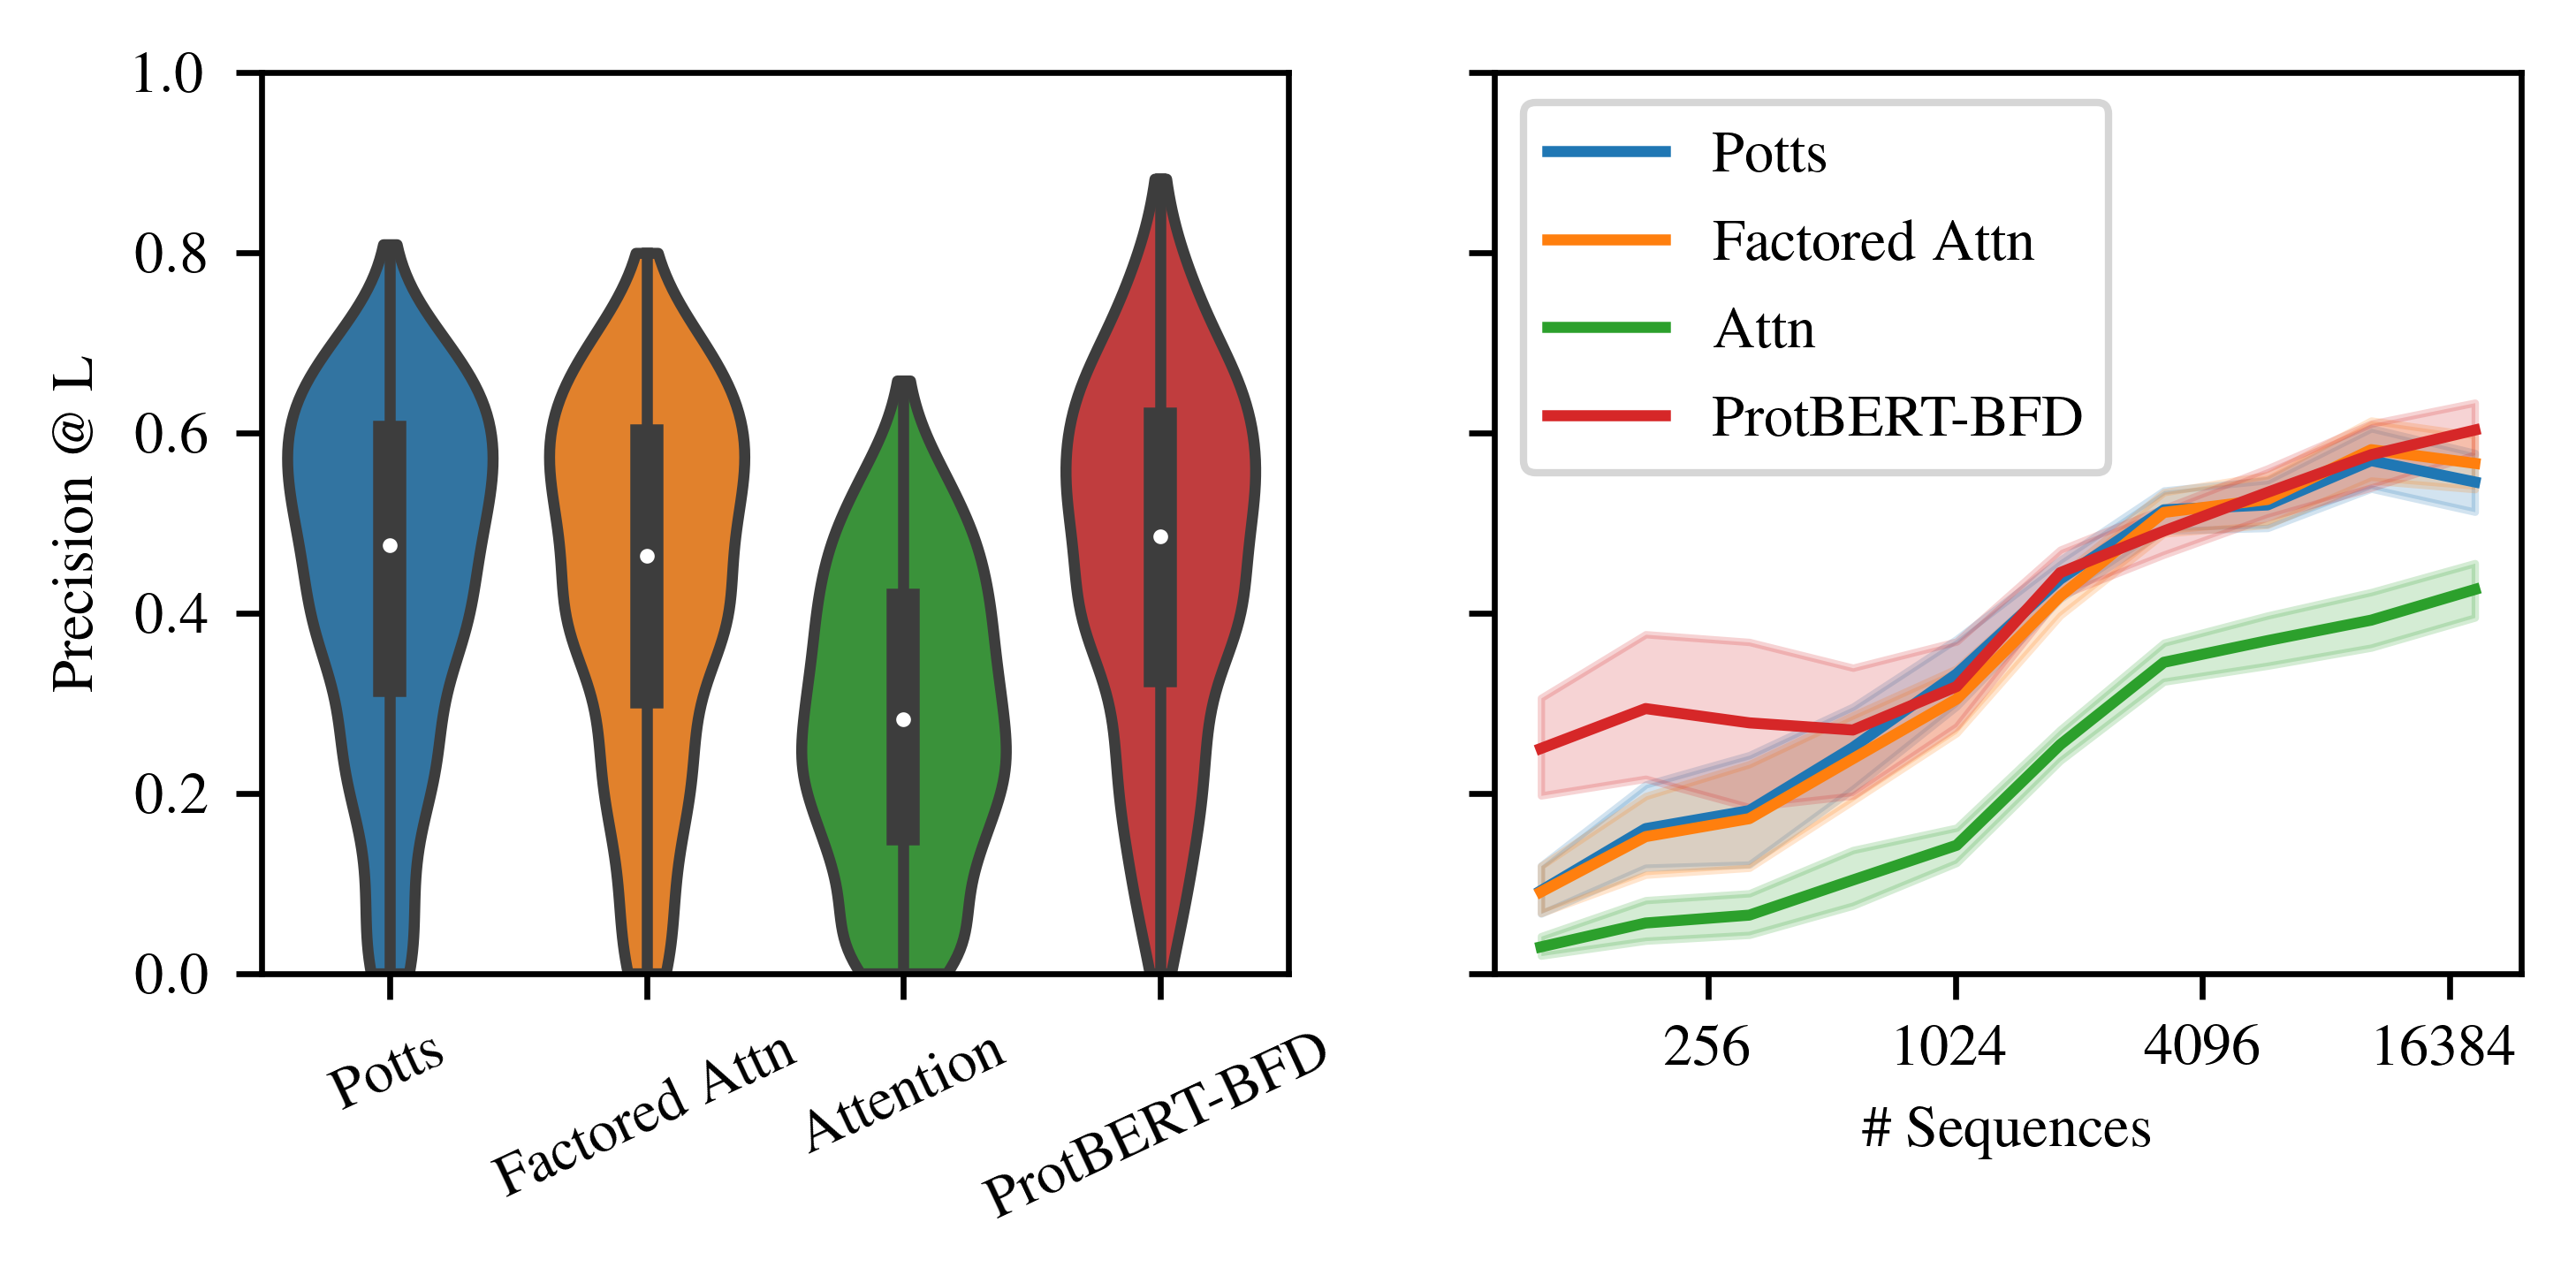

In [133]:
fig, ax = plt.subplots(figsize=(5.5, 2.25), dpi=600, ncols=2, sharey=True)
sns.violinplot(x="sweep_name", y="pr_at_L", order=["gremlin-apc", "fatt-apc", "transformer-apc", "protbert_bfd-apc"], data=df, cut=0, ax=ax[0])
out, bins = pd.cut(df["log_num_seqs"], bins=10, retbins=True, include_lowest=True, labels=False)
sns.lineplot(x=bins[np.array(out, dtype=np.int32)], y="pr_at_L", hue="sweep_name", hue_order=["gremlin-apc", "fatt-apc", "transformer-apc", "protbert_bfd-apc"], data=df, ax=ax[1])
ax[0].set_xticklabels(["Potts", "Factored Attn", "Attention", "ProtBERT-BFD"], Rotation=25)
ax[0].set_xlabel("")
ax[0].set_ylabel("Precision @ L")
ax[0].set_ylim(0, 1.0)
ax[1].legend(["Potts", "Factored Attn", "Attn", "ProtBERT-BFD"])
ax[1].set_xlabel("\# Sequences")
ax[1].set_xticks([8, 10, 12, 14])
ax[1].set_xticklabels(2 ** np.array([8, 10, 12, 14]))
#ax[1].set_xticklabels([256, 1024, 4096, 16384])
plt.savefig("figs/final/overall_trends.pdf", bbox_inches="tight")
plt.show()

## Pr @ L/5

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


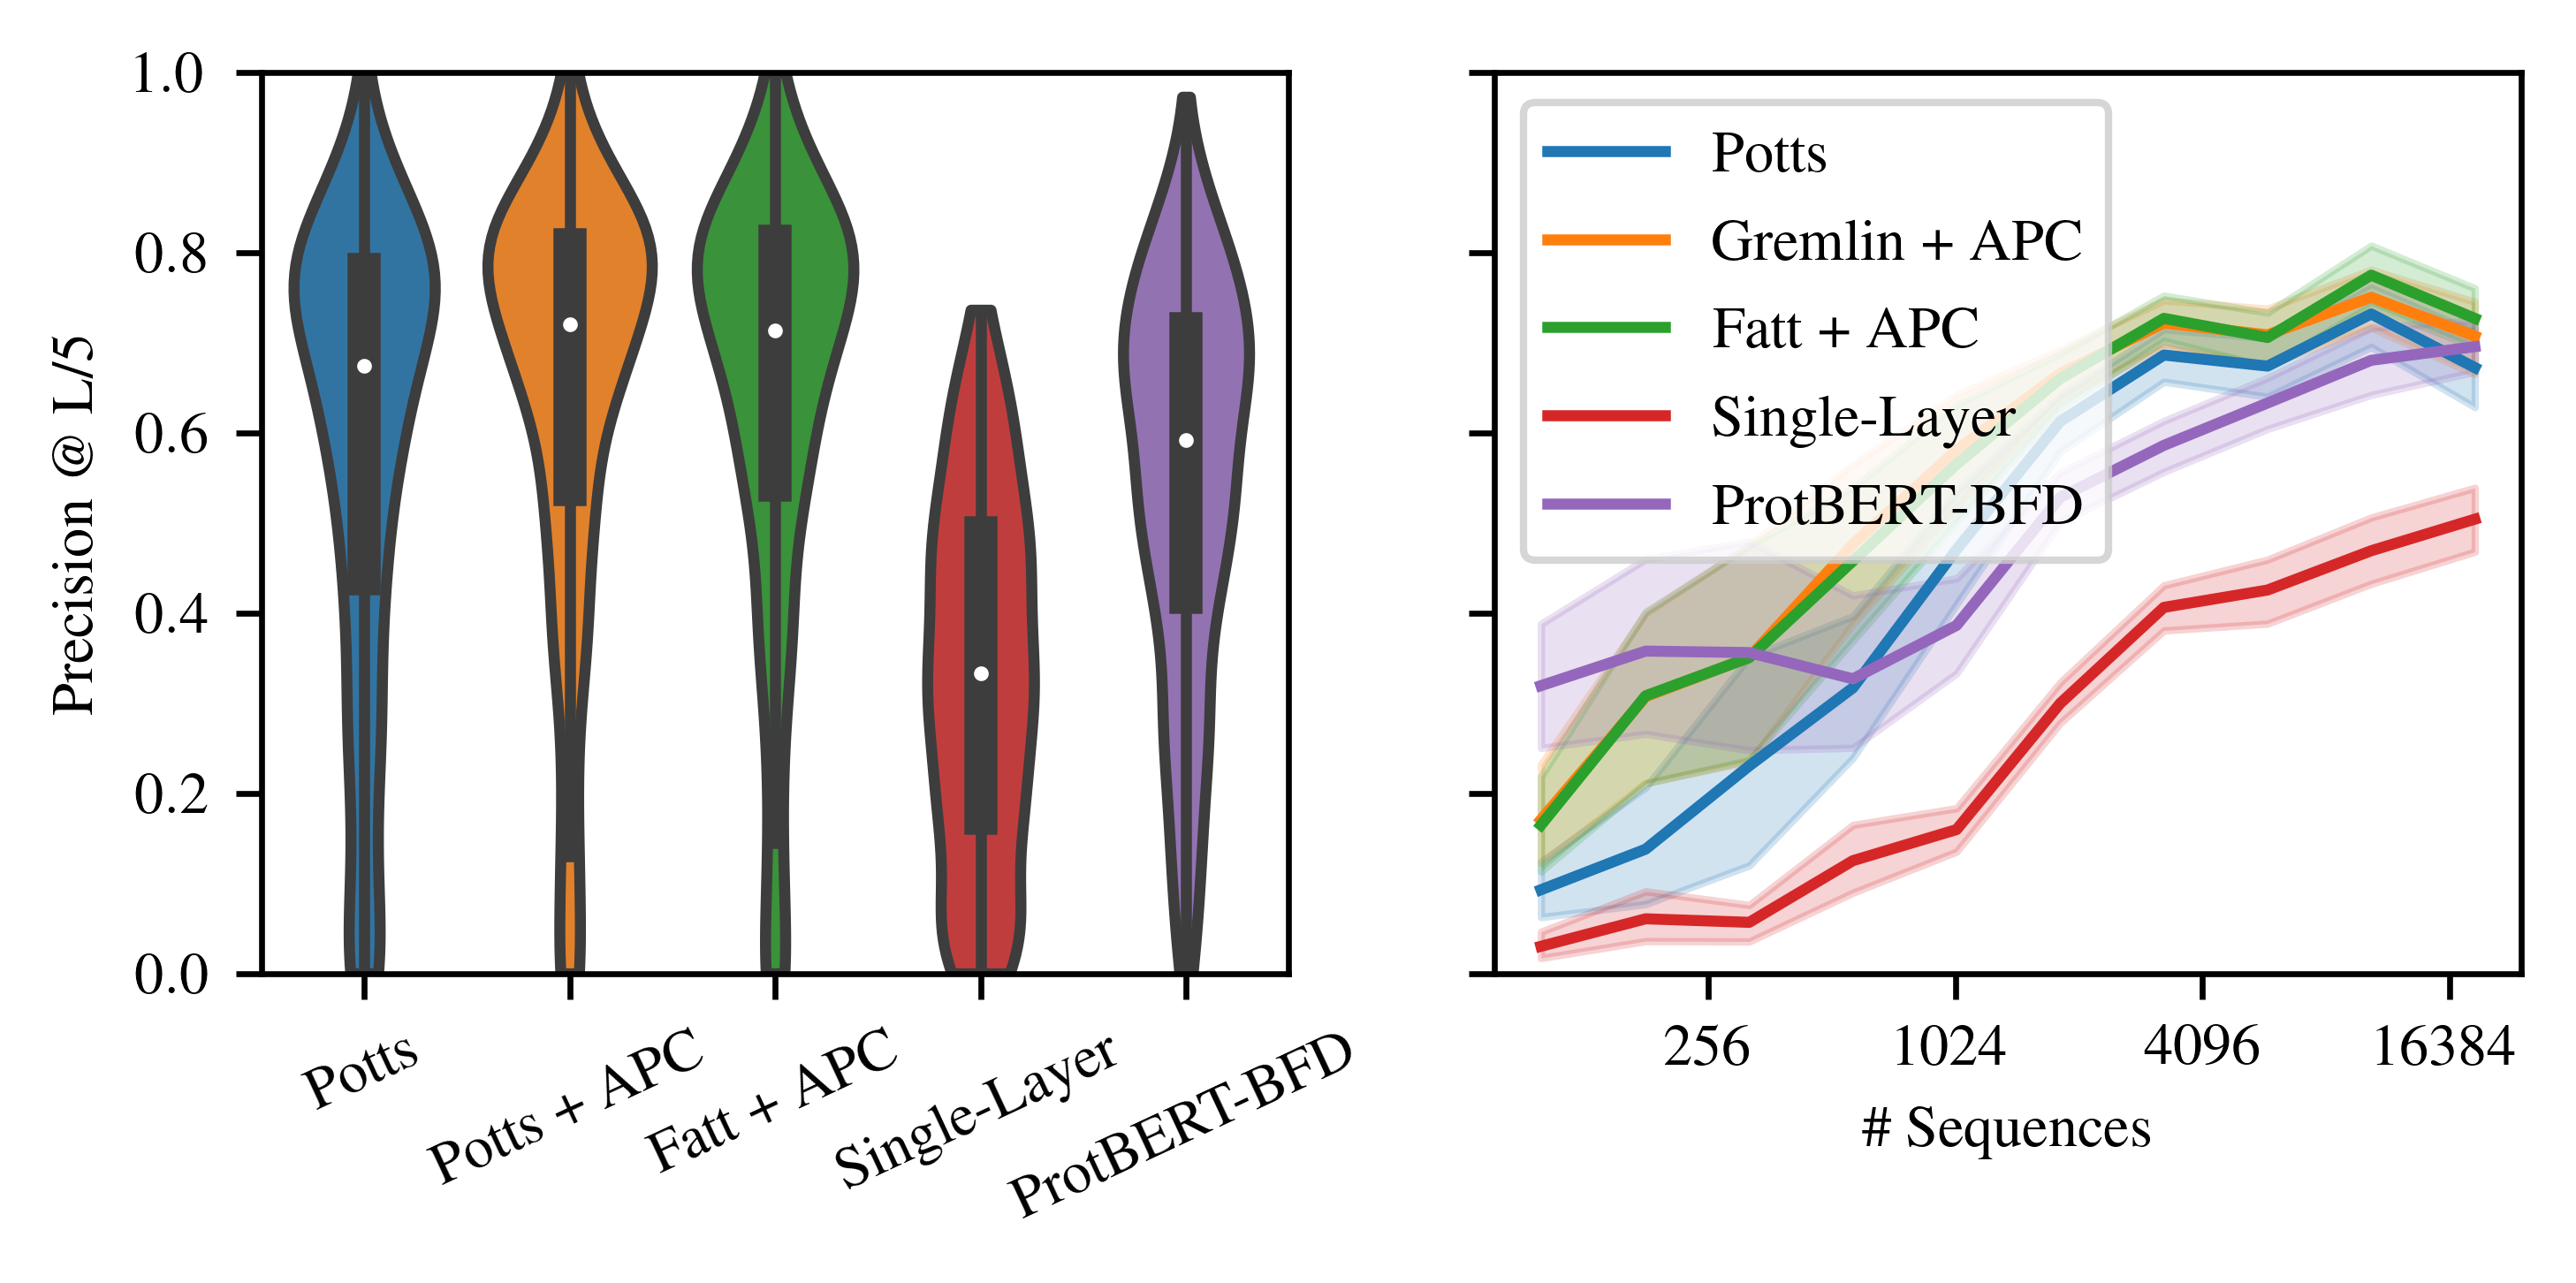

In [16]:
fig, ax = plt.subplots(figsize=(5.5, 2.25), dpi=600, ncols=2, sharey=True)
sns.violinplot(x="sweep_name", y="pr_at_L_5", order=["gremlin", "gremlin-apc", "fatt-apc", "transformer", "protbert_bfd"], data=df, cut=0, ax=ax[0])
out, bins = pd.cut(df["log_num_seqs"], bins=10, retbins=True, include_lowest=True, labels=False)
sns.lineplot(x=bins[np.array(out, dtype=np.int32)], y="pr_at_L_5", hue="sweep_name", hue_order=["gremlin", "gremlin-apc", "fatt-apc", "transformer", "protbert_bfd"], data=df, ax=ax[1])
ax[0].set_xticklabels(["Potts", "Potts + APC", "Fatt + APC", "Single-Layer", "ProtBERT-BFD"], Rotation=25)
ax[0].set_xlabel("")
ax[0].set_ylabel("Precision @ L/5")
ax[0].set_ylim(0, 1.0)
ax[1].legend(["Potts", "Gremlin + APC", "Fatt + APC", "Single-Layer", "ProtBERT-BFD"])
ax[1].set_xlabel("\# Sequences")
ax[1].set_xticks([8, 10, 12, 14])
ax[1].set_xticklabels(2 ** np.array([8, 10, 12, 14]))
#ax[1].set_xticklabels([256, 1024, 4096, 16384])
#plt.savefig("fig_3_draft.pdf")
plt.show()

## AUC

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


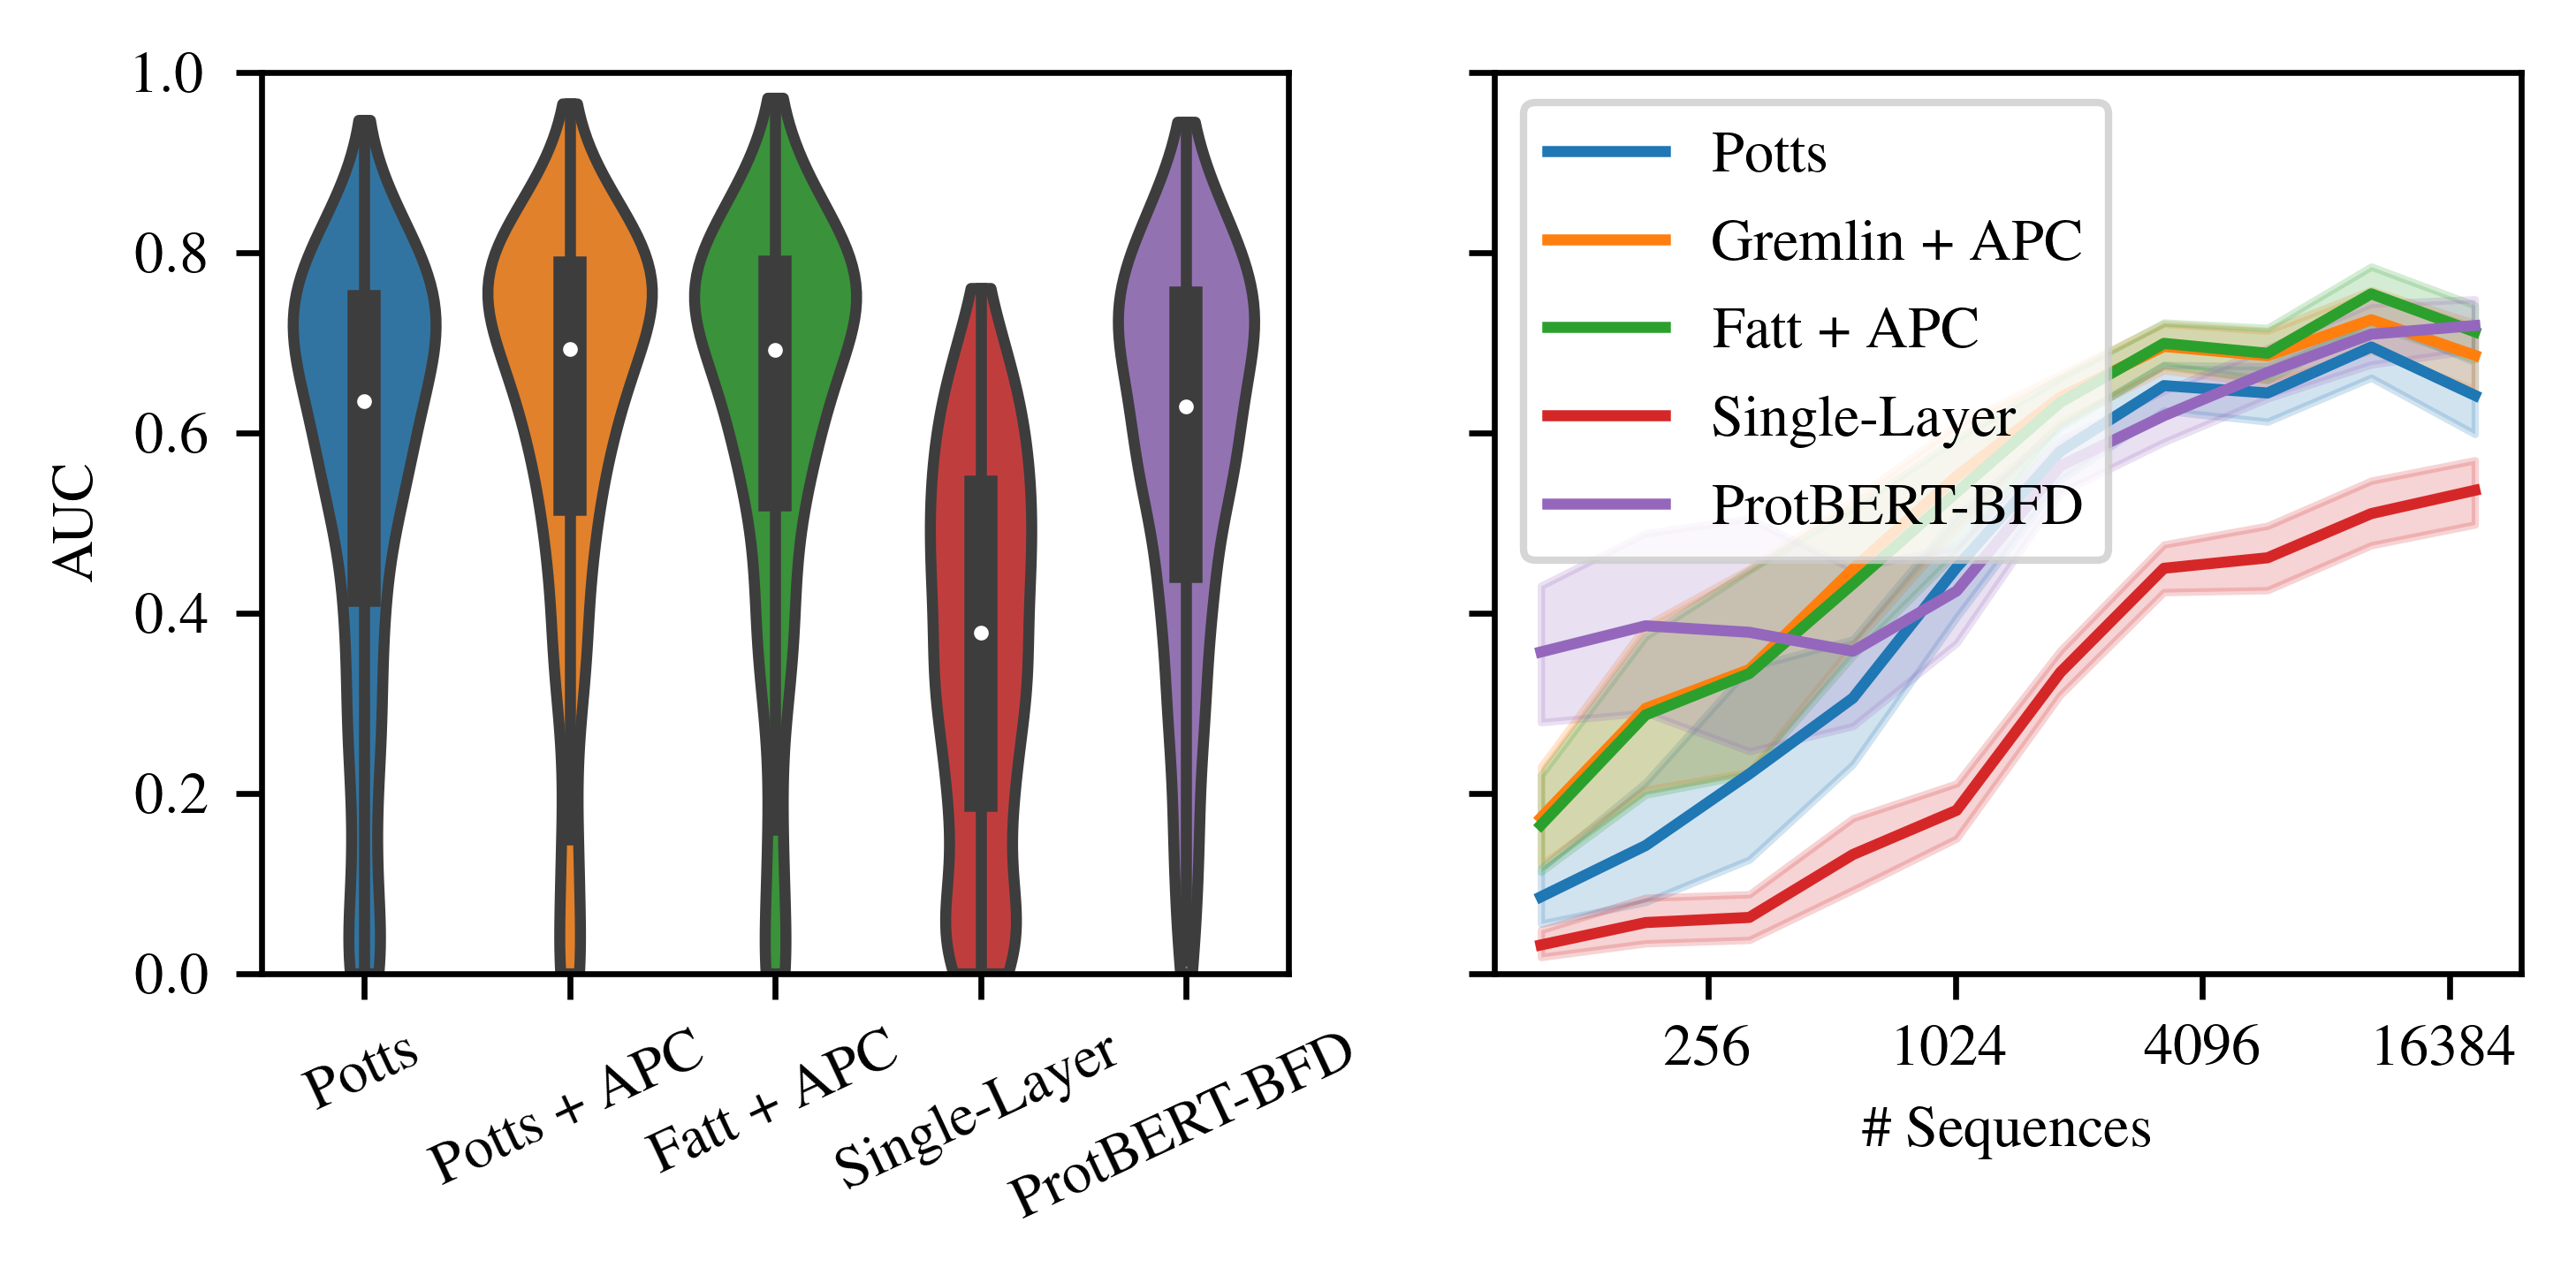

In [18]:
fig, ax = plt.subplots(figsize=(5.5, 2.25), dpi=600, ncols=2, sharey=True)
sns.violinplot(x="sweep_name", y="auc", order=["gremlin", "gremlin-apc", "fatt-apc", "transformer", "protbert_bfd"], data=df, cut=0, ax=ax[0])
out, bins = pd.cut(df["log_num_seqs"], bins=10, retbins=True, include_lowest=True, labels=False)
sns.lineplot(x=bins[np.array(out, dtype=np.int32)], y="auc", hue="sweep_name", hue_order=["gremlin", "gremlin-apc", "fatt-apc", "transformer", "protbert_bfd"], data=df, ax=ax[1])
ax[0].set_xticklabels(["Potts", "Potts + APC", "Fatt + APC", "Single-Layer", "ProtBERT-BFD"], Rotation=25)
ax[0].set_xlabel("")
ax[0].set_ylabel("AUC")
ax[0].set_ylim(0, 1.0)
ax[1].legend(["Potts", "Gremlin + APC", "Fatt + APC", "Single-Layer", "ProtBERT-BFD"])
ax[1].set_xlabel("\# Sequences")
ax[1].set_xticks([8, 10, 12, 14])
ax[1].set_xticklabels(2 ** np.array([8, 10, 12, 14]))
#ax[1].set_xticklabels([256, 1024, 4096, 16384])
#plt.savefig("fig_3_draft.pdf")
plt.show()

In [285]:
HEAD_RUNS = {
    "fatt-8-32": "8yi6a4w5",
    "fatt-128": "32emd6ri",
    "fatt-256": "xuofwjtc",
    "fatt-512": "bxnkt0uq",
}

heads_df = load_full_df(RUNS, [])

# Helps set even scaling for trend plots
head_num_to_idx = {
    8: 0,
    16: 1,
    32: 2,
    128: 3,
    256: 4,
    512: 5,
}
heads_df["heads_idx"] = heads_df.num_attention_heads.map(lambda x : head_num_to_idx[x])

  0%|          | 0/2233 [00:00<?, ?it/s]

8yi6a4w5 has 2233 runs


100%|██████████| 748/748 [00:00<00:00, 34473.61it/s]

32emd6ri has 748 runs



100%|██████████| 748/748 [00:00<00:00, 31428.08it/s]

xuofwjtc has 748 runs



100%|██████████| 748/748 [00:00<00:00, 34119.69it/s]

bxnkt0uq has 748 runs
Shape pre dropping NaNs (4470, 17)
Shape post dropping NaNs (4470, 17)



/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/nickbhat/projects/iclr-2021-factored-attention/compare_wandb.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

# Exact Parameter Counts (Fig 4 New)

In [381]:
intervals**2 // 1e6

array([  0.,   4.,  16.,  36.,  64., 100., 144., 196.])

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


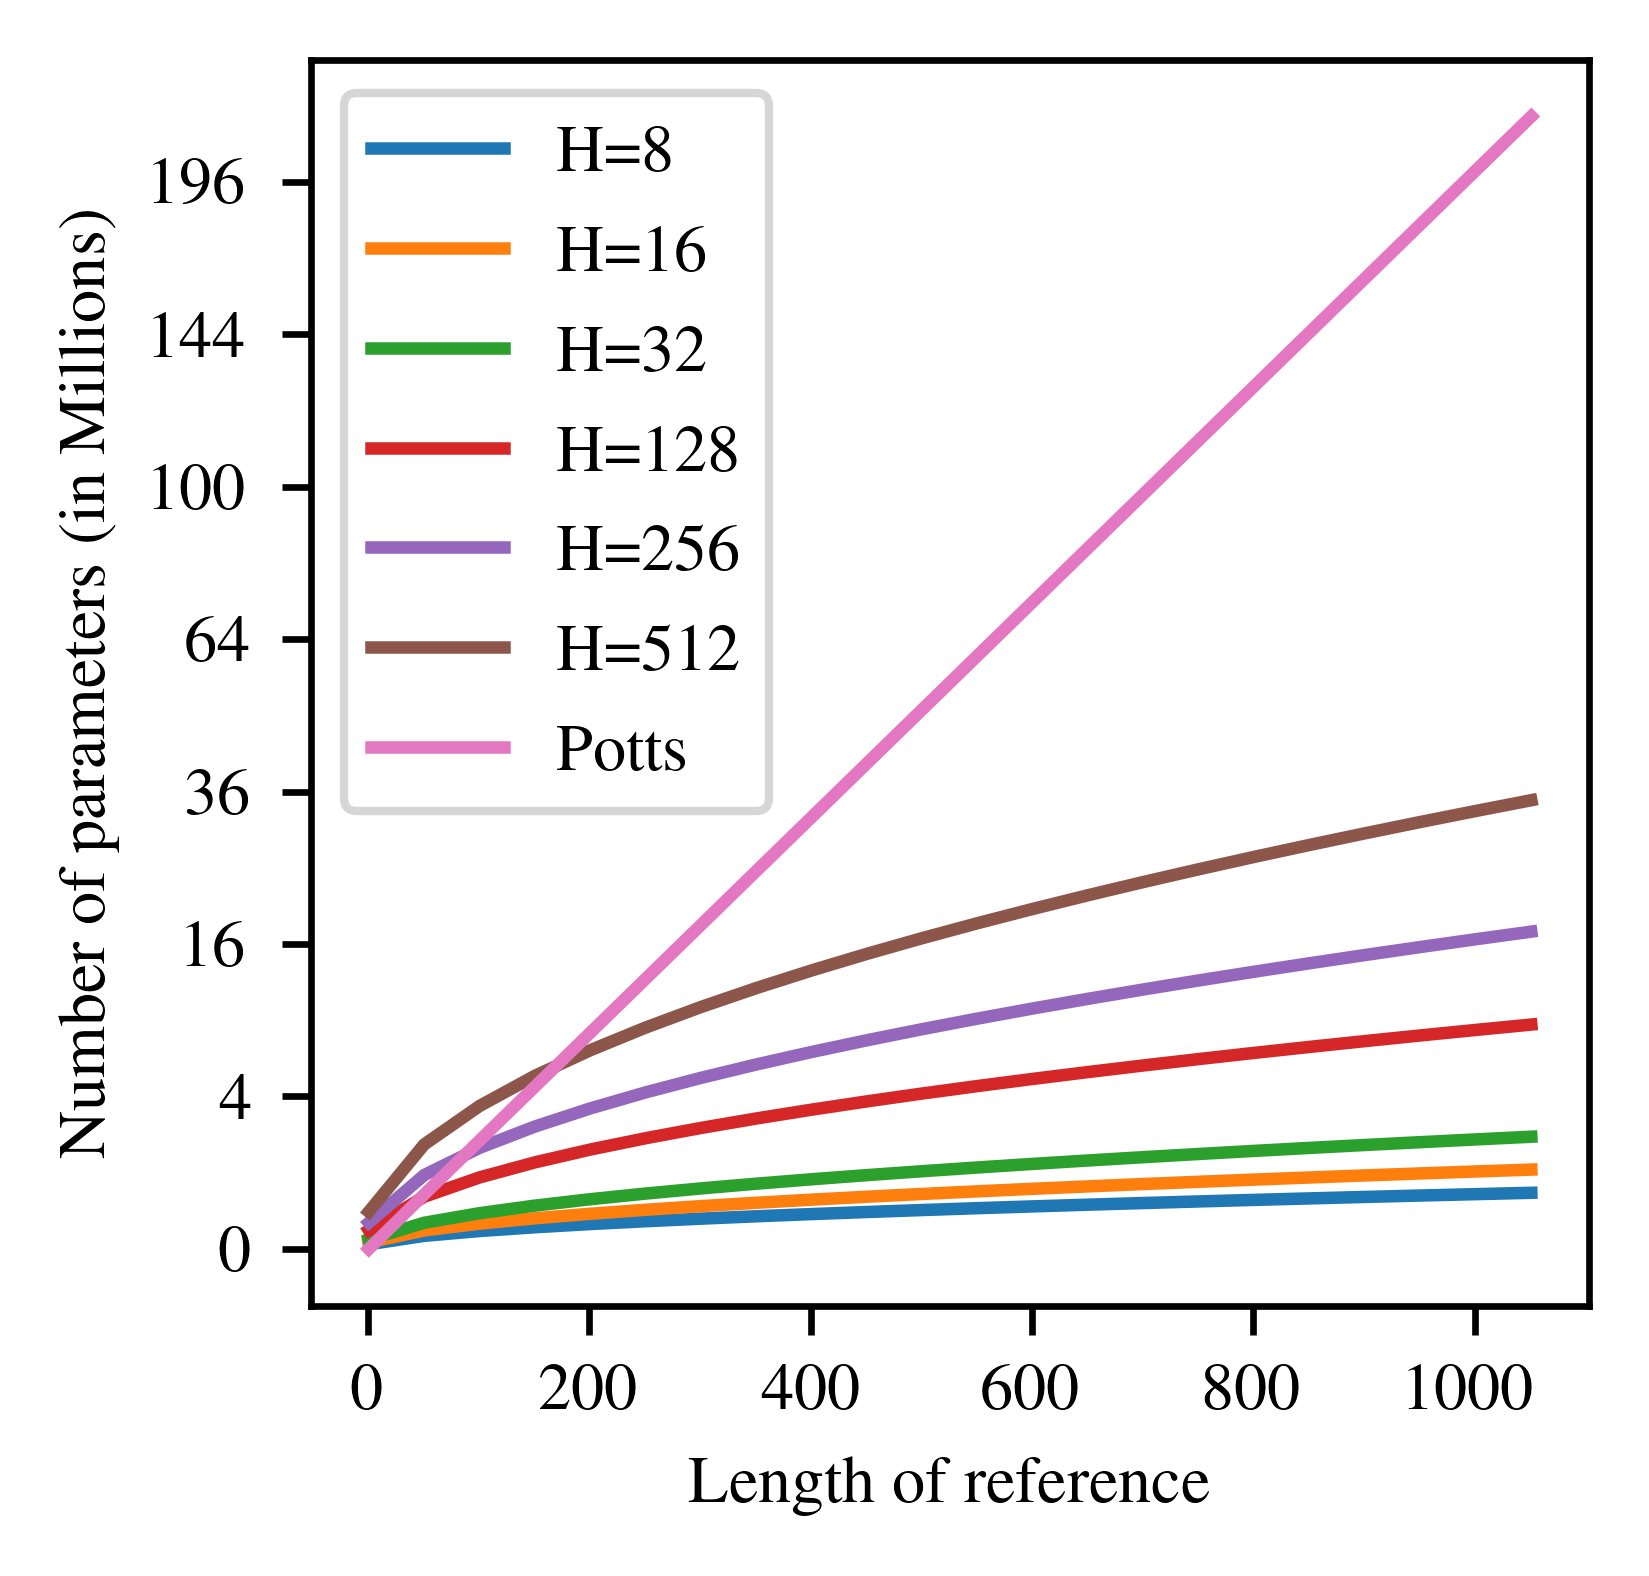

In [383]:
def gremlin(l):
    return l * (l - 1) * 200

def fatt(l, h, d):
    return h * (2 * d * l + 400)

intervals = np.array([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000])

D = 32
lens = np.arange(1, 1053, 50)

fig, ax = plt.subplots(figsize=(2.75, 2.75), dpi=600)
for H in [8, 16, 32, 128, 256, 512]:
    ax.plot(lens, np.sqrt(fatt(lens, H, D)), label=f"H={H}")
ax.plot(lens, np.sqrt(gremlin(lens)), label="Potts")
ax.legend()
ax.set_ylabel("Number of parameters (in Millions)")
ax.set_xlabel("Length of reference")
ax.set_xticks([0, 200, 400, 600, 800, 1000])
ax.set_yticklabels([0] + list(np.array(intervals**2 // 1e6).astype(np.int32)))
#ax.ticklabel_format(axis="y", style="sci")
plt.savefig("figs/final/param_counts.pdf", bbox_inches="tight")
plt.show()

# Performance Head Trends (Fig 5 New)

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


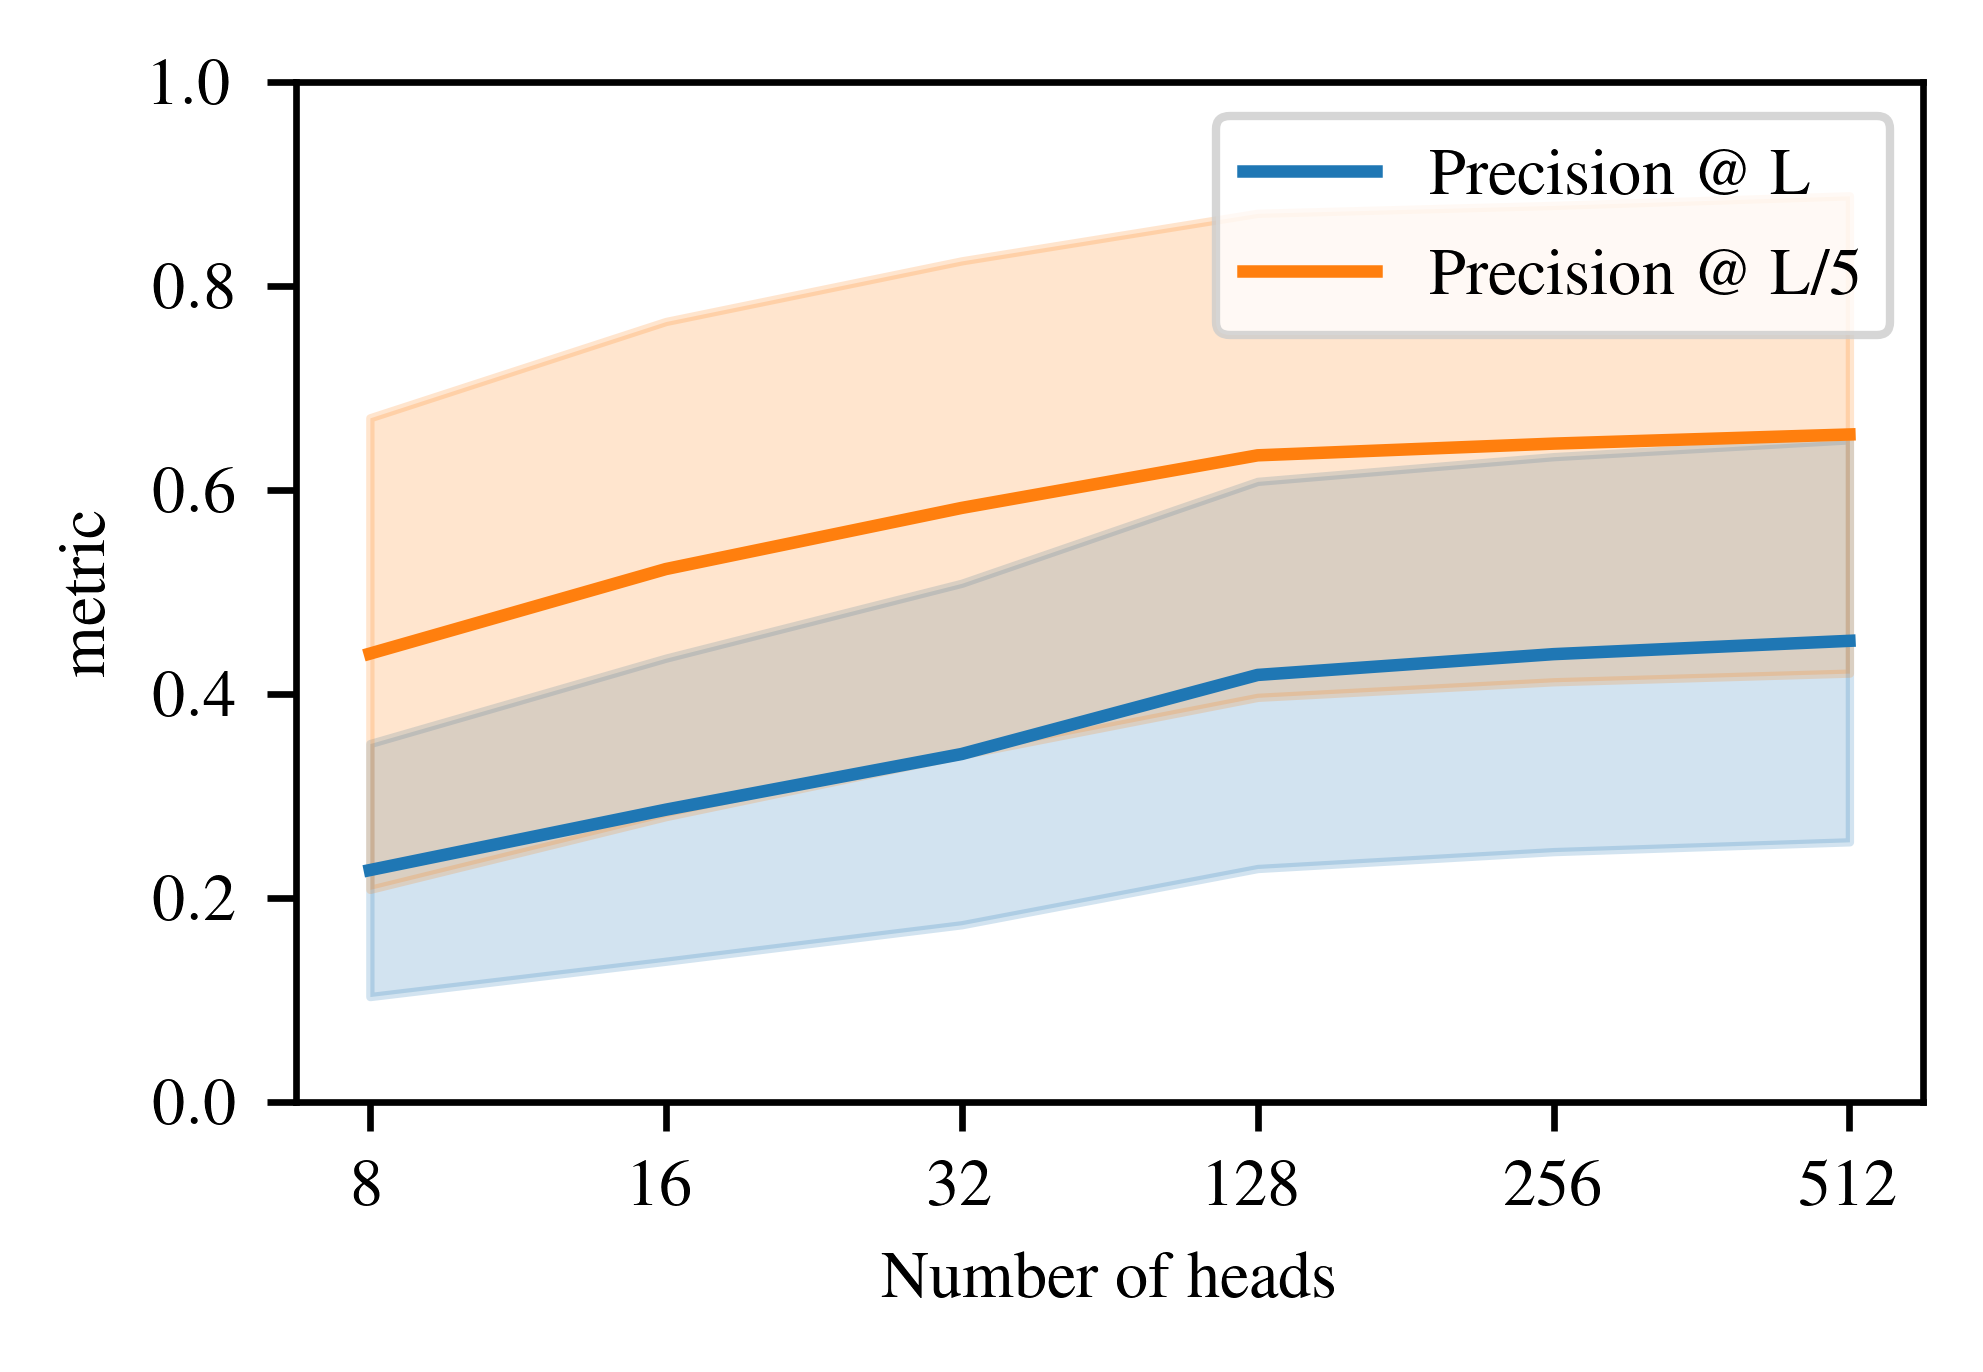

In [302]:
melted = pd.melt(heads_df, id_vars="heads_idx", value_vars=["pr_at_L_apc", "pr_at_L_5_apc"], var_name="metric")

fig, ax = plt.subplots(figsize=(3.5, 2.25), dpi=600)
sns.lineplot(x="heads_idx", y="value", hue="metric", data=melted, ax=ax, ci="sd")
ax.legend(["Precision @ L", "Precision @ L/5"])
ax.set_xlabel("Number of heads")
ax.set_ylabel("metric")
ax.set_ylim(0, 1.0)
ax.set_xticklabels([0, 8, 16, 32, 128, 256, 512])
plt.show()

In [375]:
gremlin_df = df[df.sweep_name == "gremlin"]
gremlin_df["heads_idx"] = 6
gremlin_heads_df = pd.concat([heads_df, gremlin_df])

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


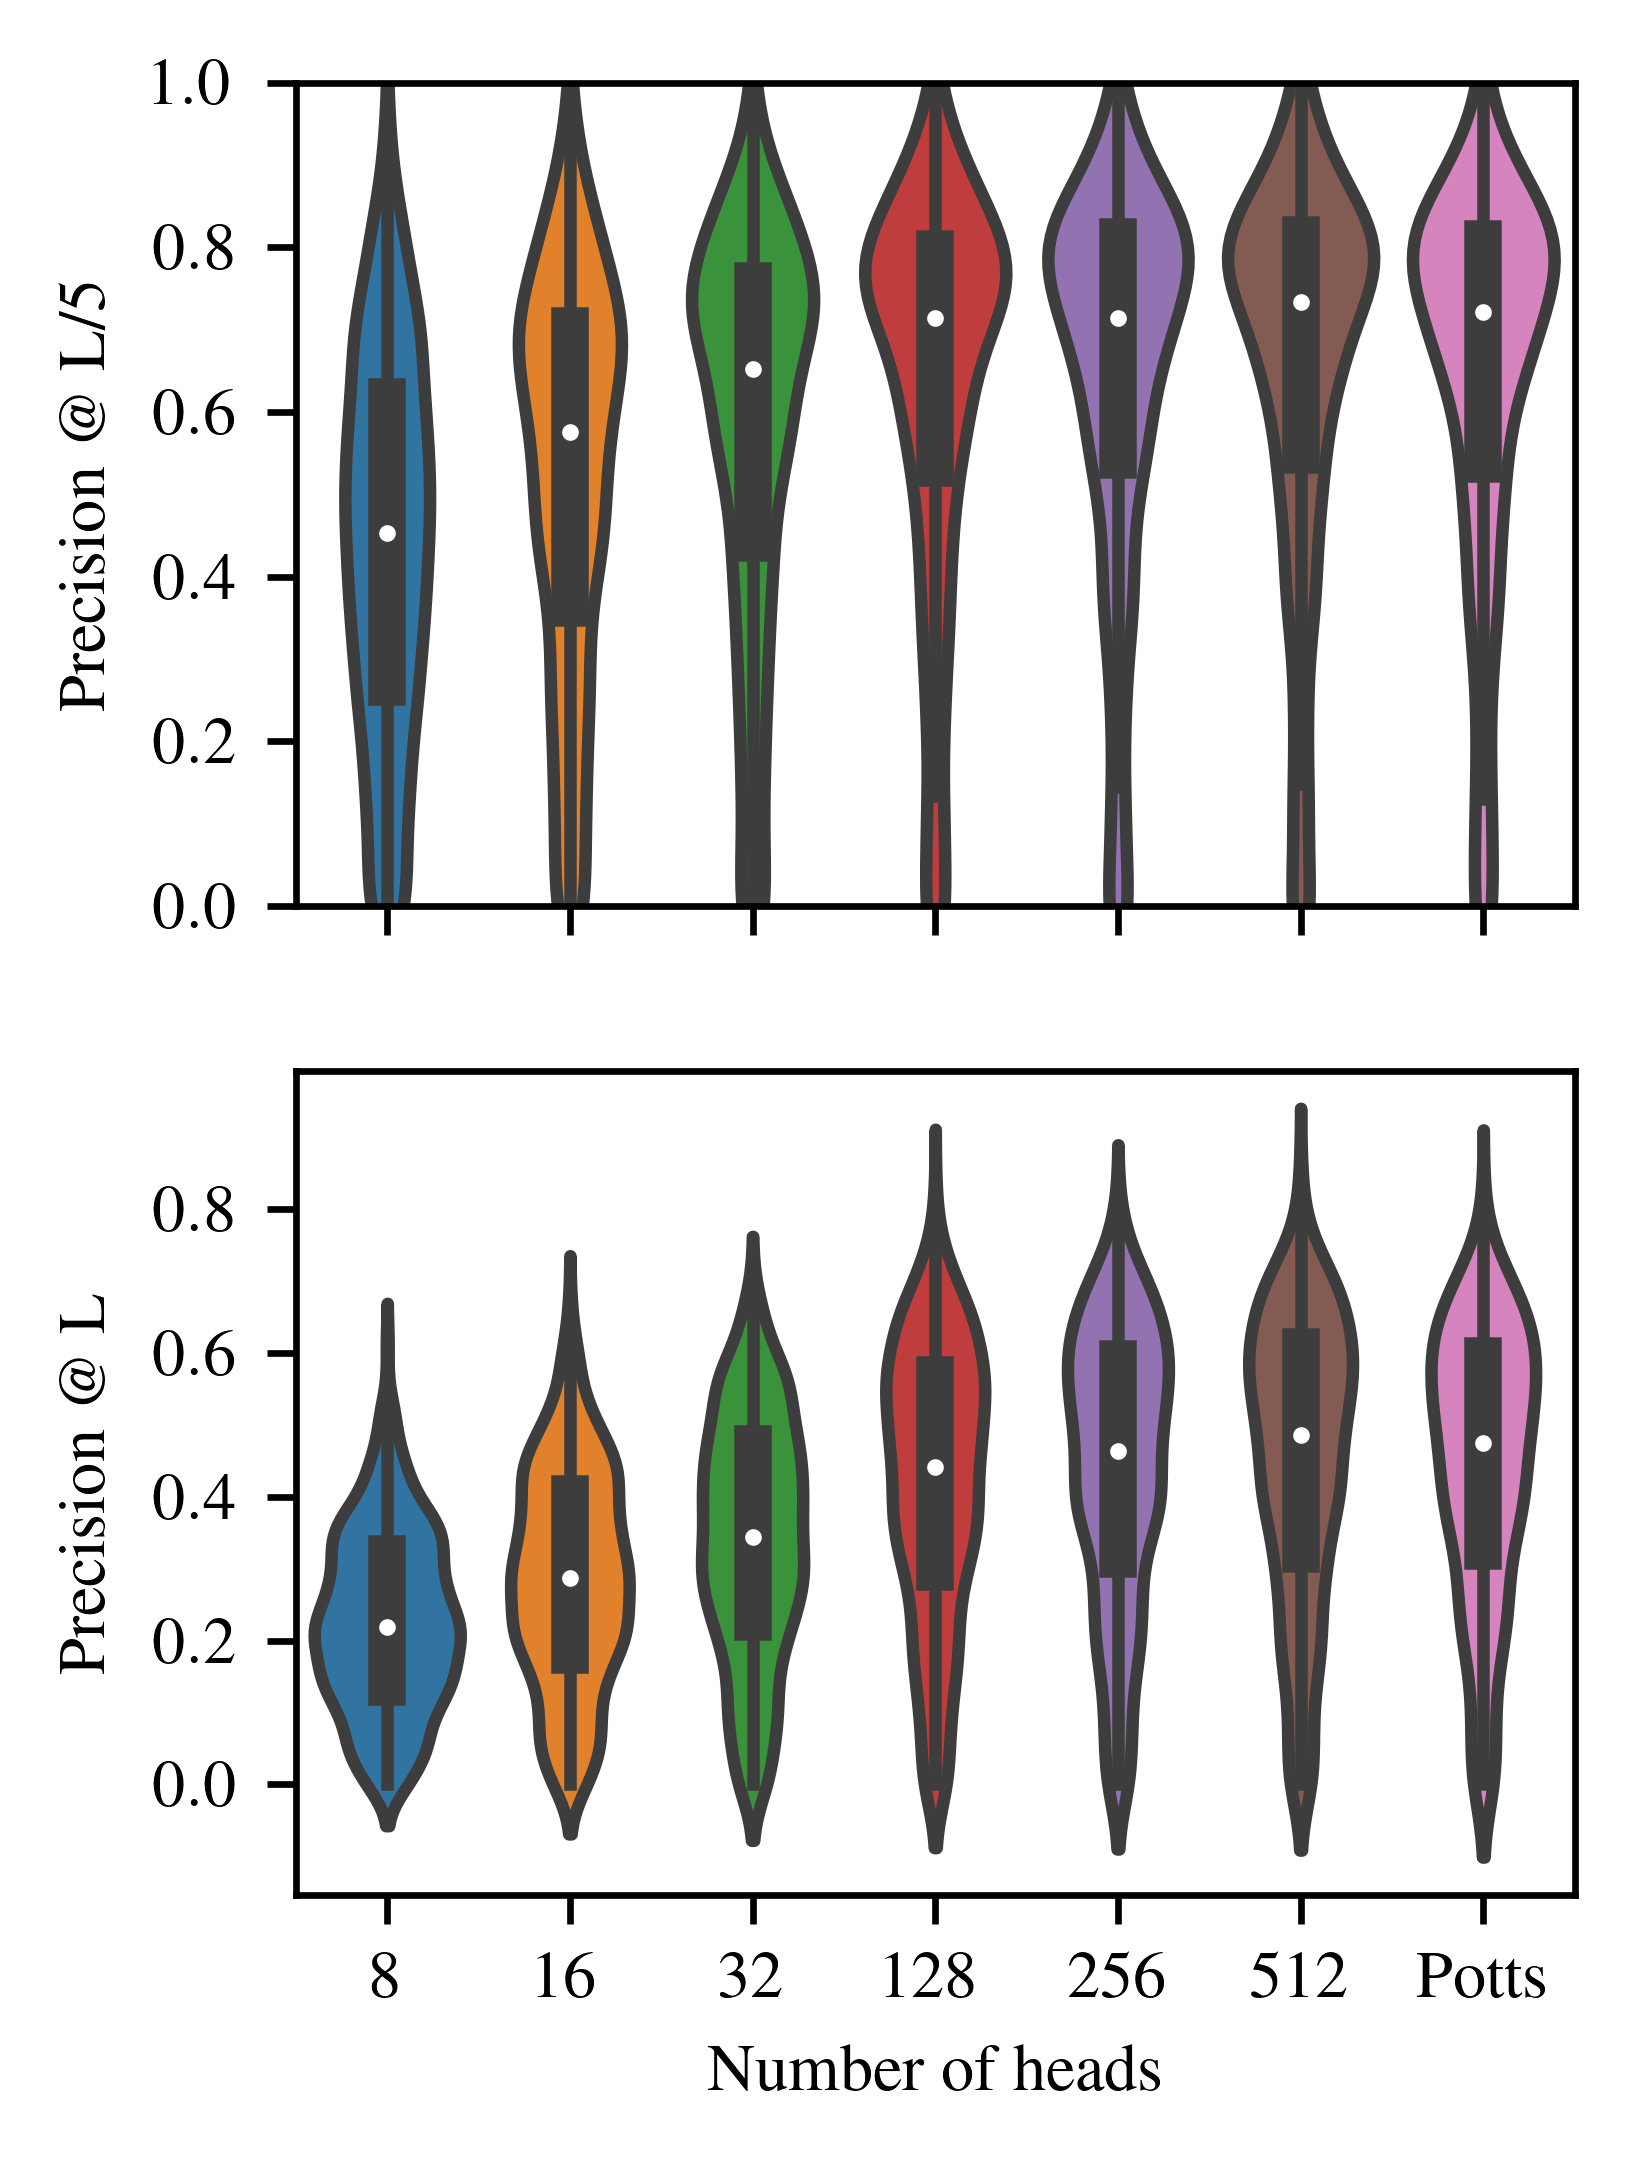

In [377]:
fig, ax = plt.subplots(figsize=(2.75, 4.), nrows=2, sharex = True, dpi=600) 

sns.violinplot(x="heads_idx", y="pr_at_L_5_apc", data=gremlin_heads_df, ax=ax[0])
sns.violinplot(x="heads_idx", y="pr_at_L_apc", data=gremlin_heads_df, ax=ax[1])
ax[0].set_ylabel("Precision @ L/5")
ax[0].set_ylim(0, 1.0)
ax[0].set_xticklabels([8, 16, 32, 128, 256, 512, "Potts"])
ax[0].set_xlabel("")
ax[1].set_xlabel("Number of heads")
ax[1].set_ylabel("Precision @ L")
plt.savefig("figs/final/head_size_trends.pdf", bbox_inches="tight")
plt.show()

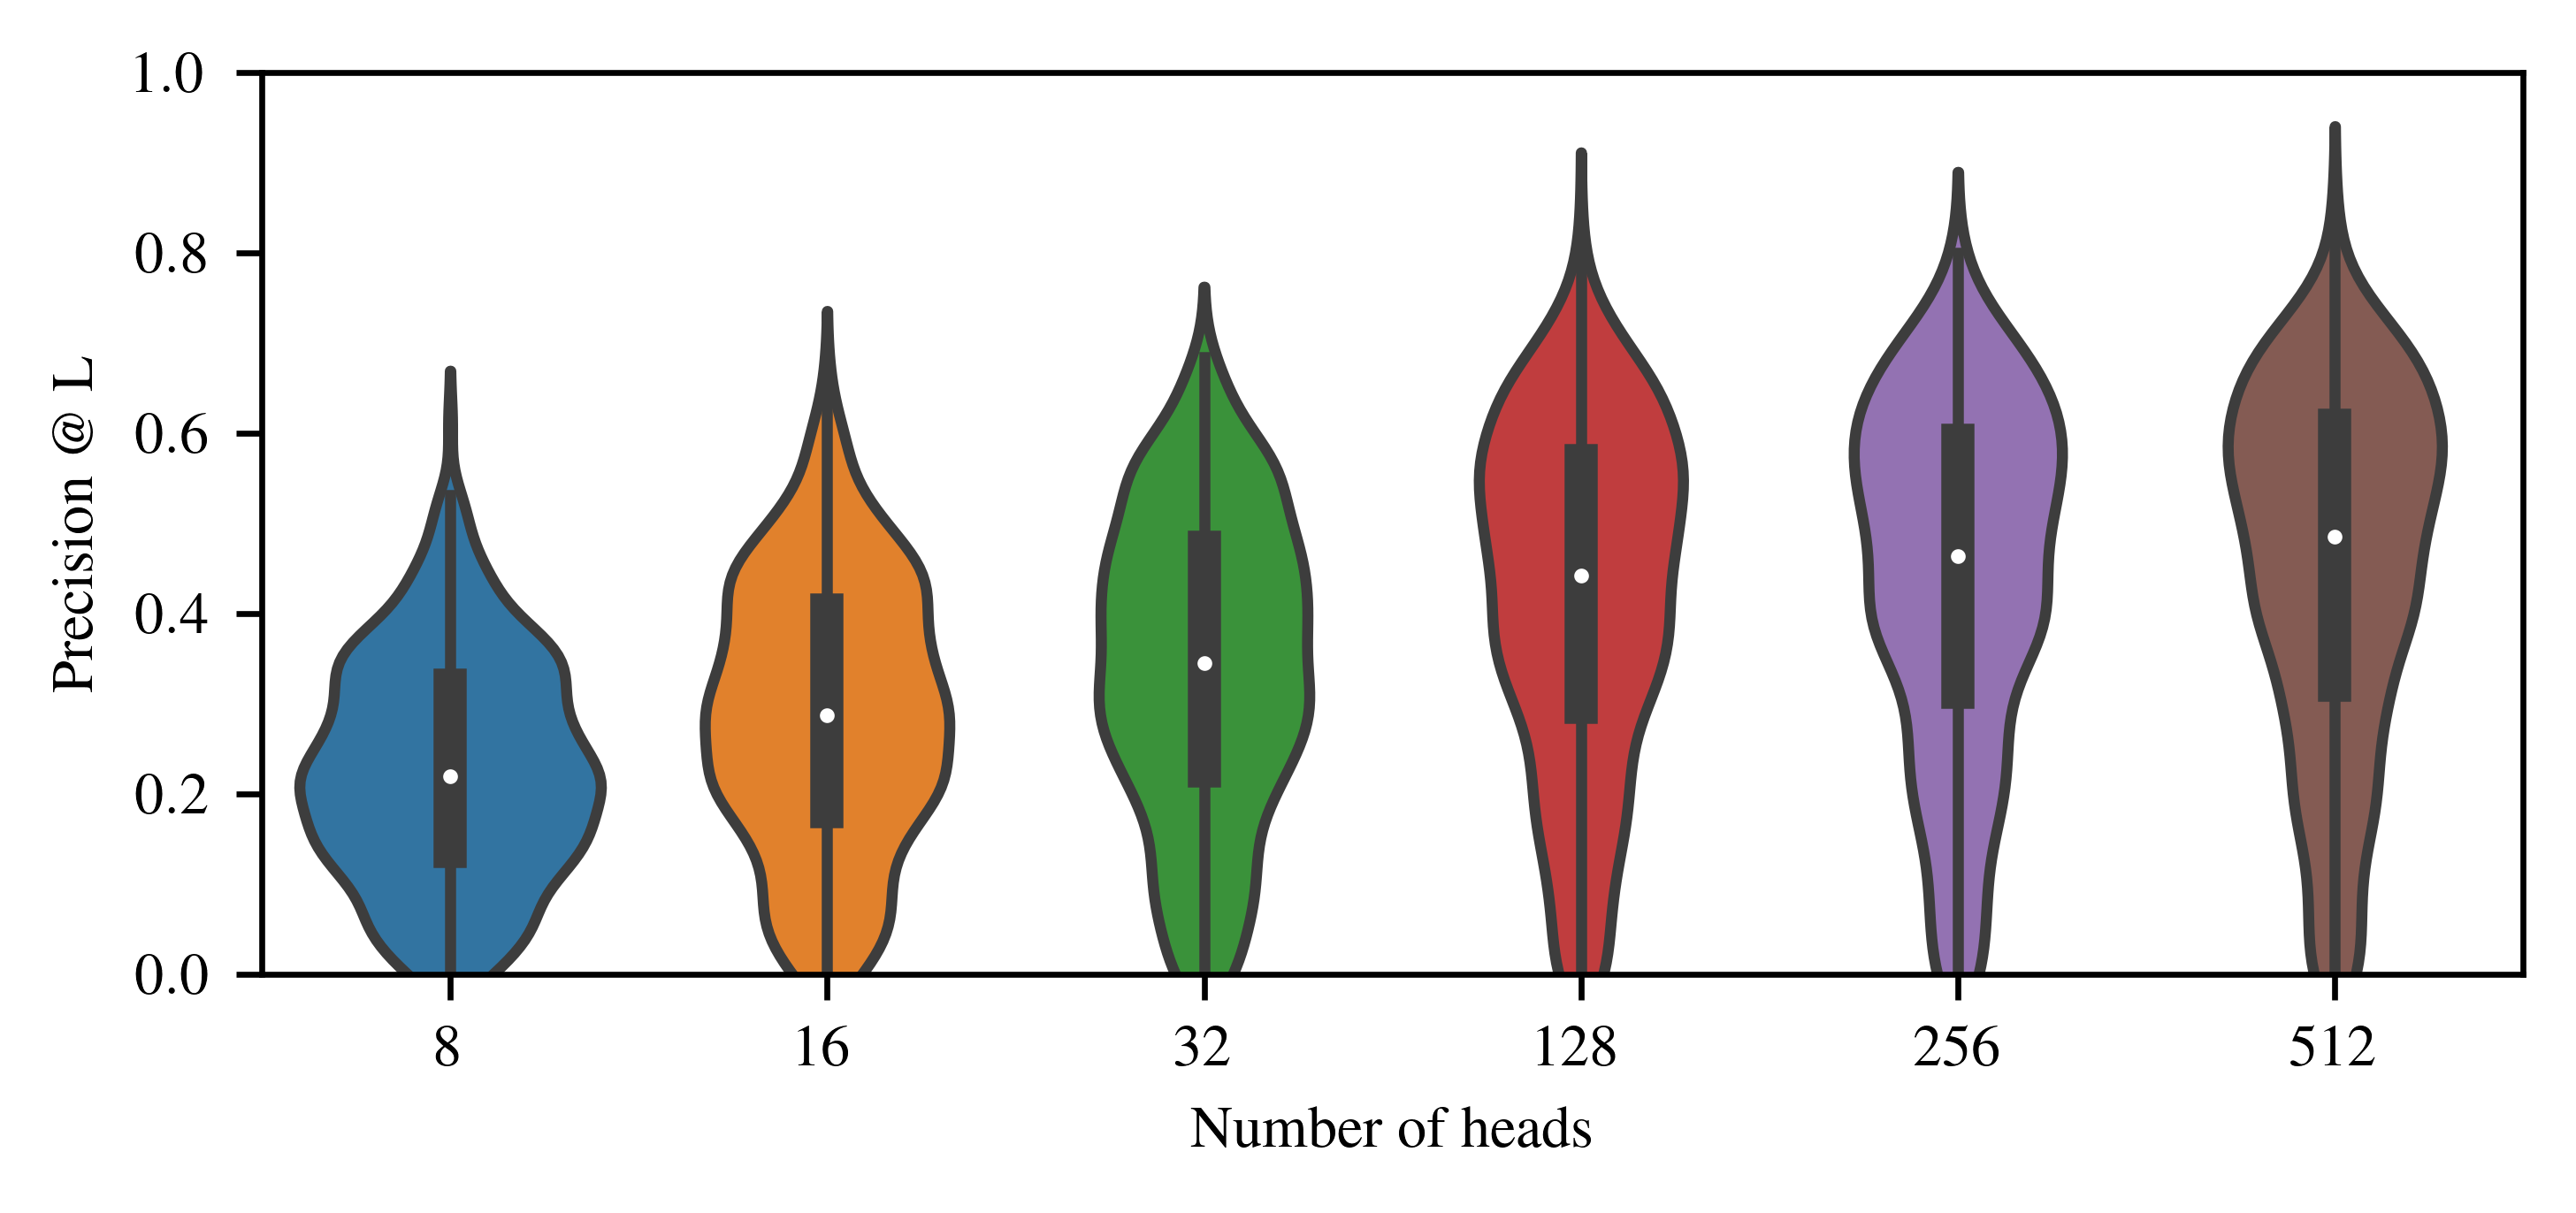

In [277]:
fig, ax = plt.subplots(figsize=(5.5, 2.25), dpi=600)
sns.violinplot(x="heads_idx", y="pr_at_L_apc", data=heads_df, ax=ax)
ax.set_xlabel("Number of heads")
ax.set_ylabel("Precision @ L")
ax.set_ylim(0, 1.0)
ax.set_xticklabels([8, 16, 32, 128, 256, 512])
plt.show()

# Gremlin MLM vs PL (Fig 5)

comparison families:  742
spoagef


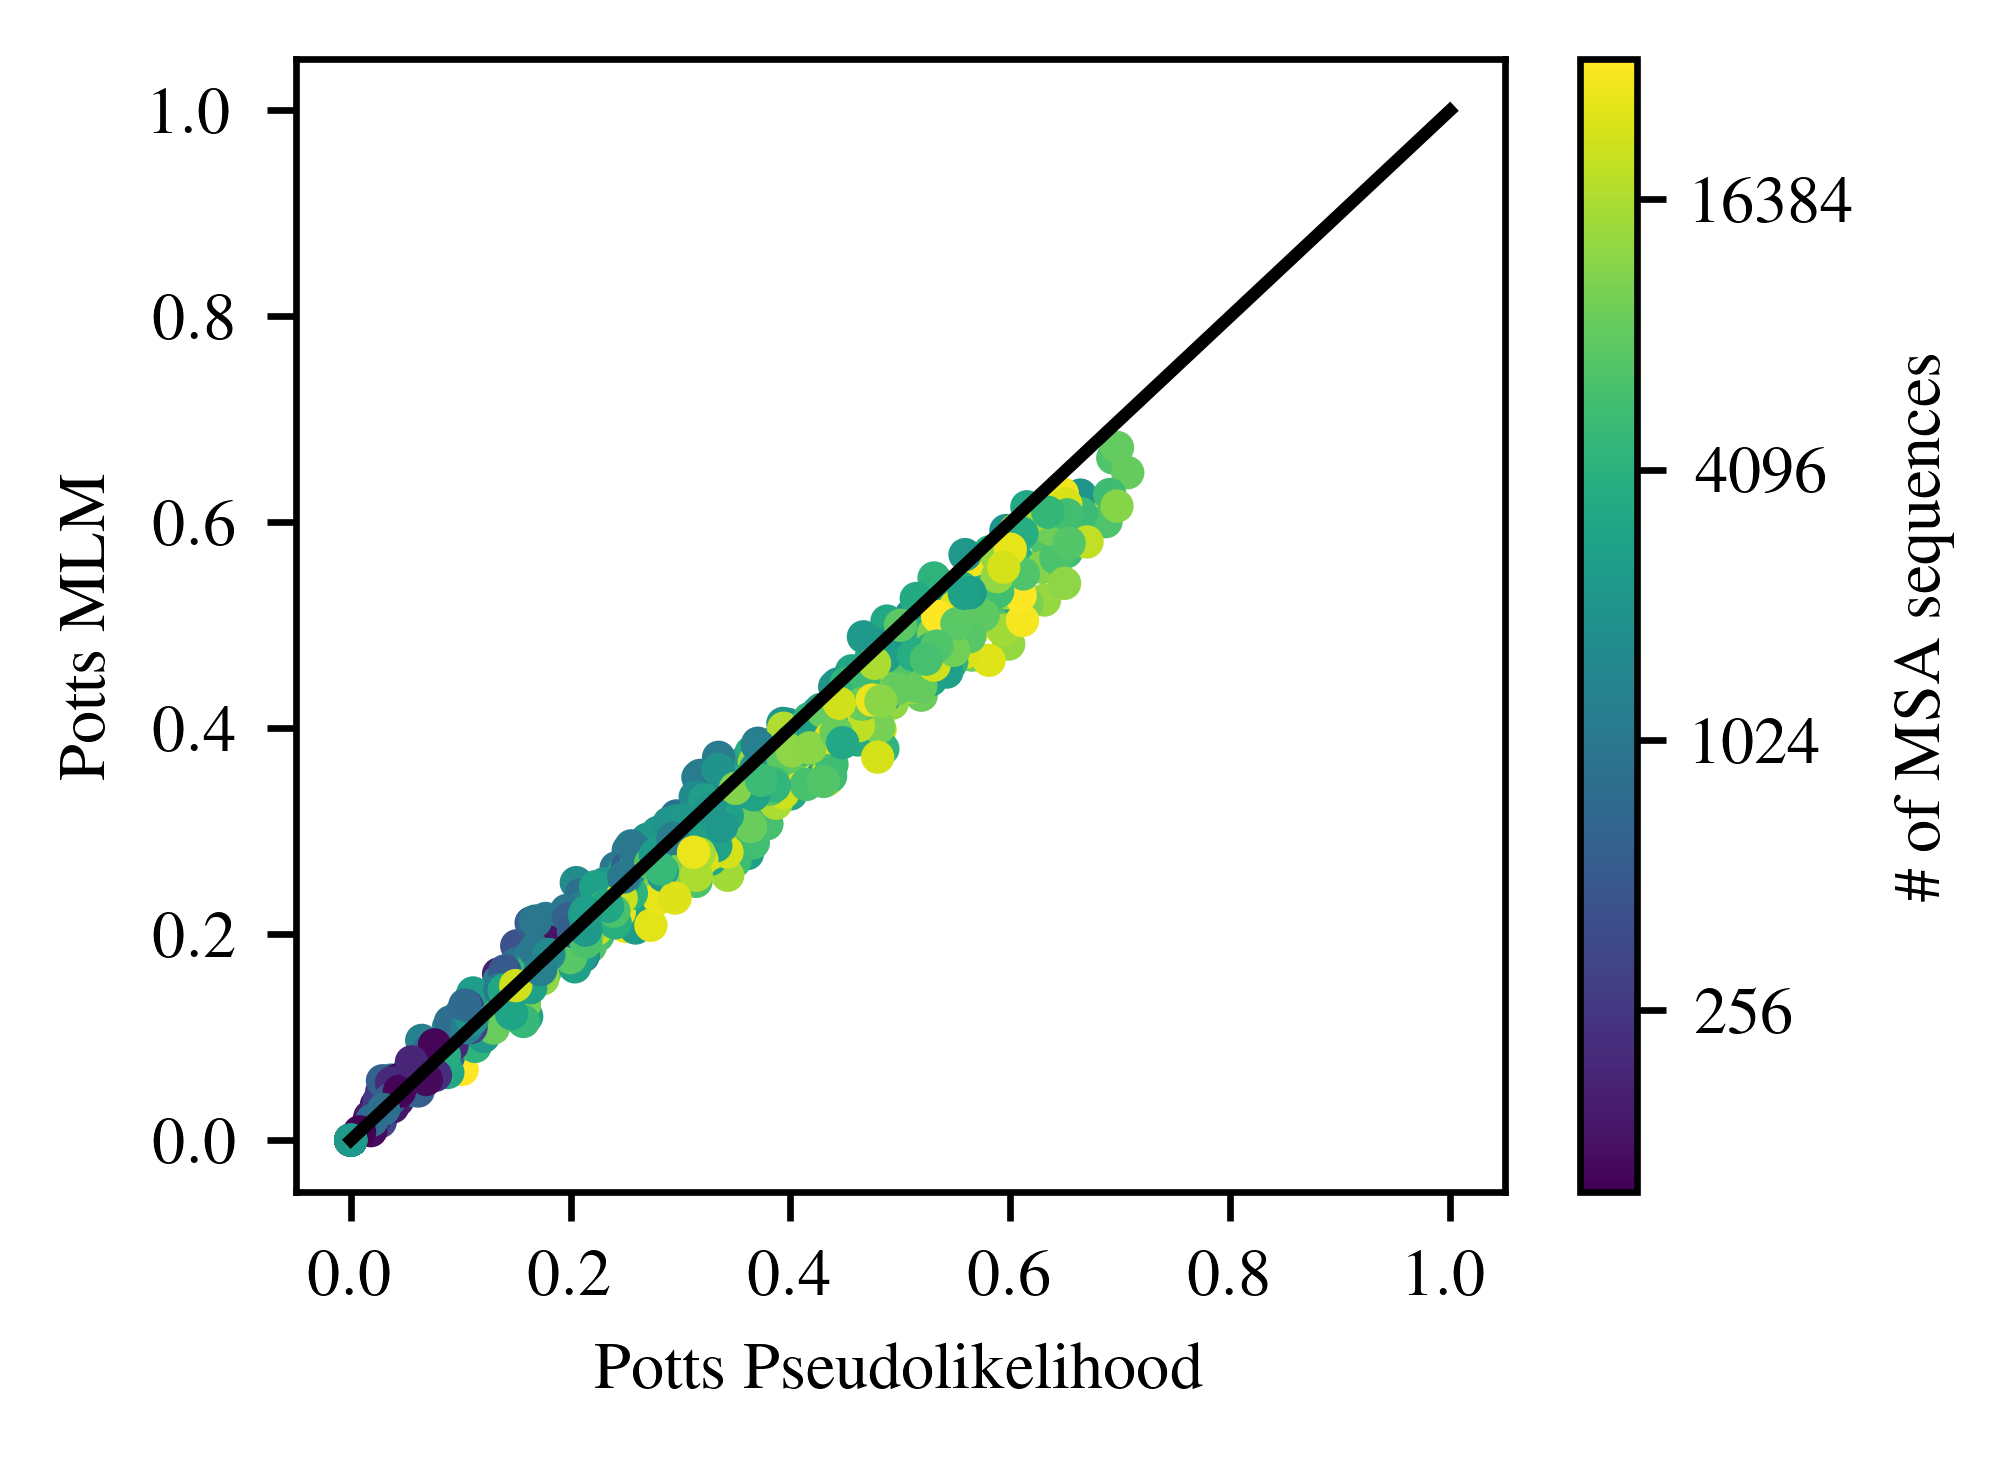

comparison families:  738
spoagef


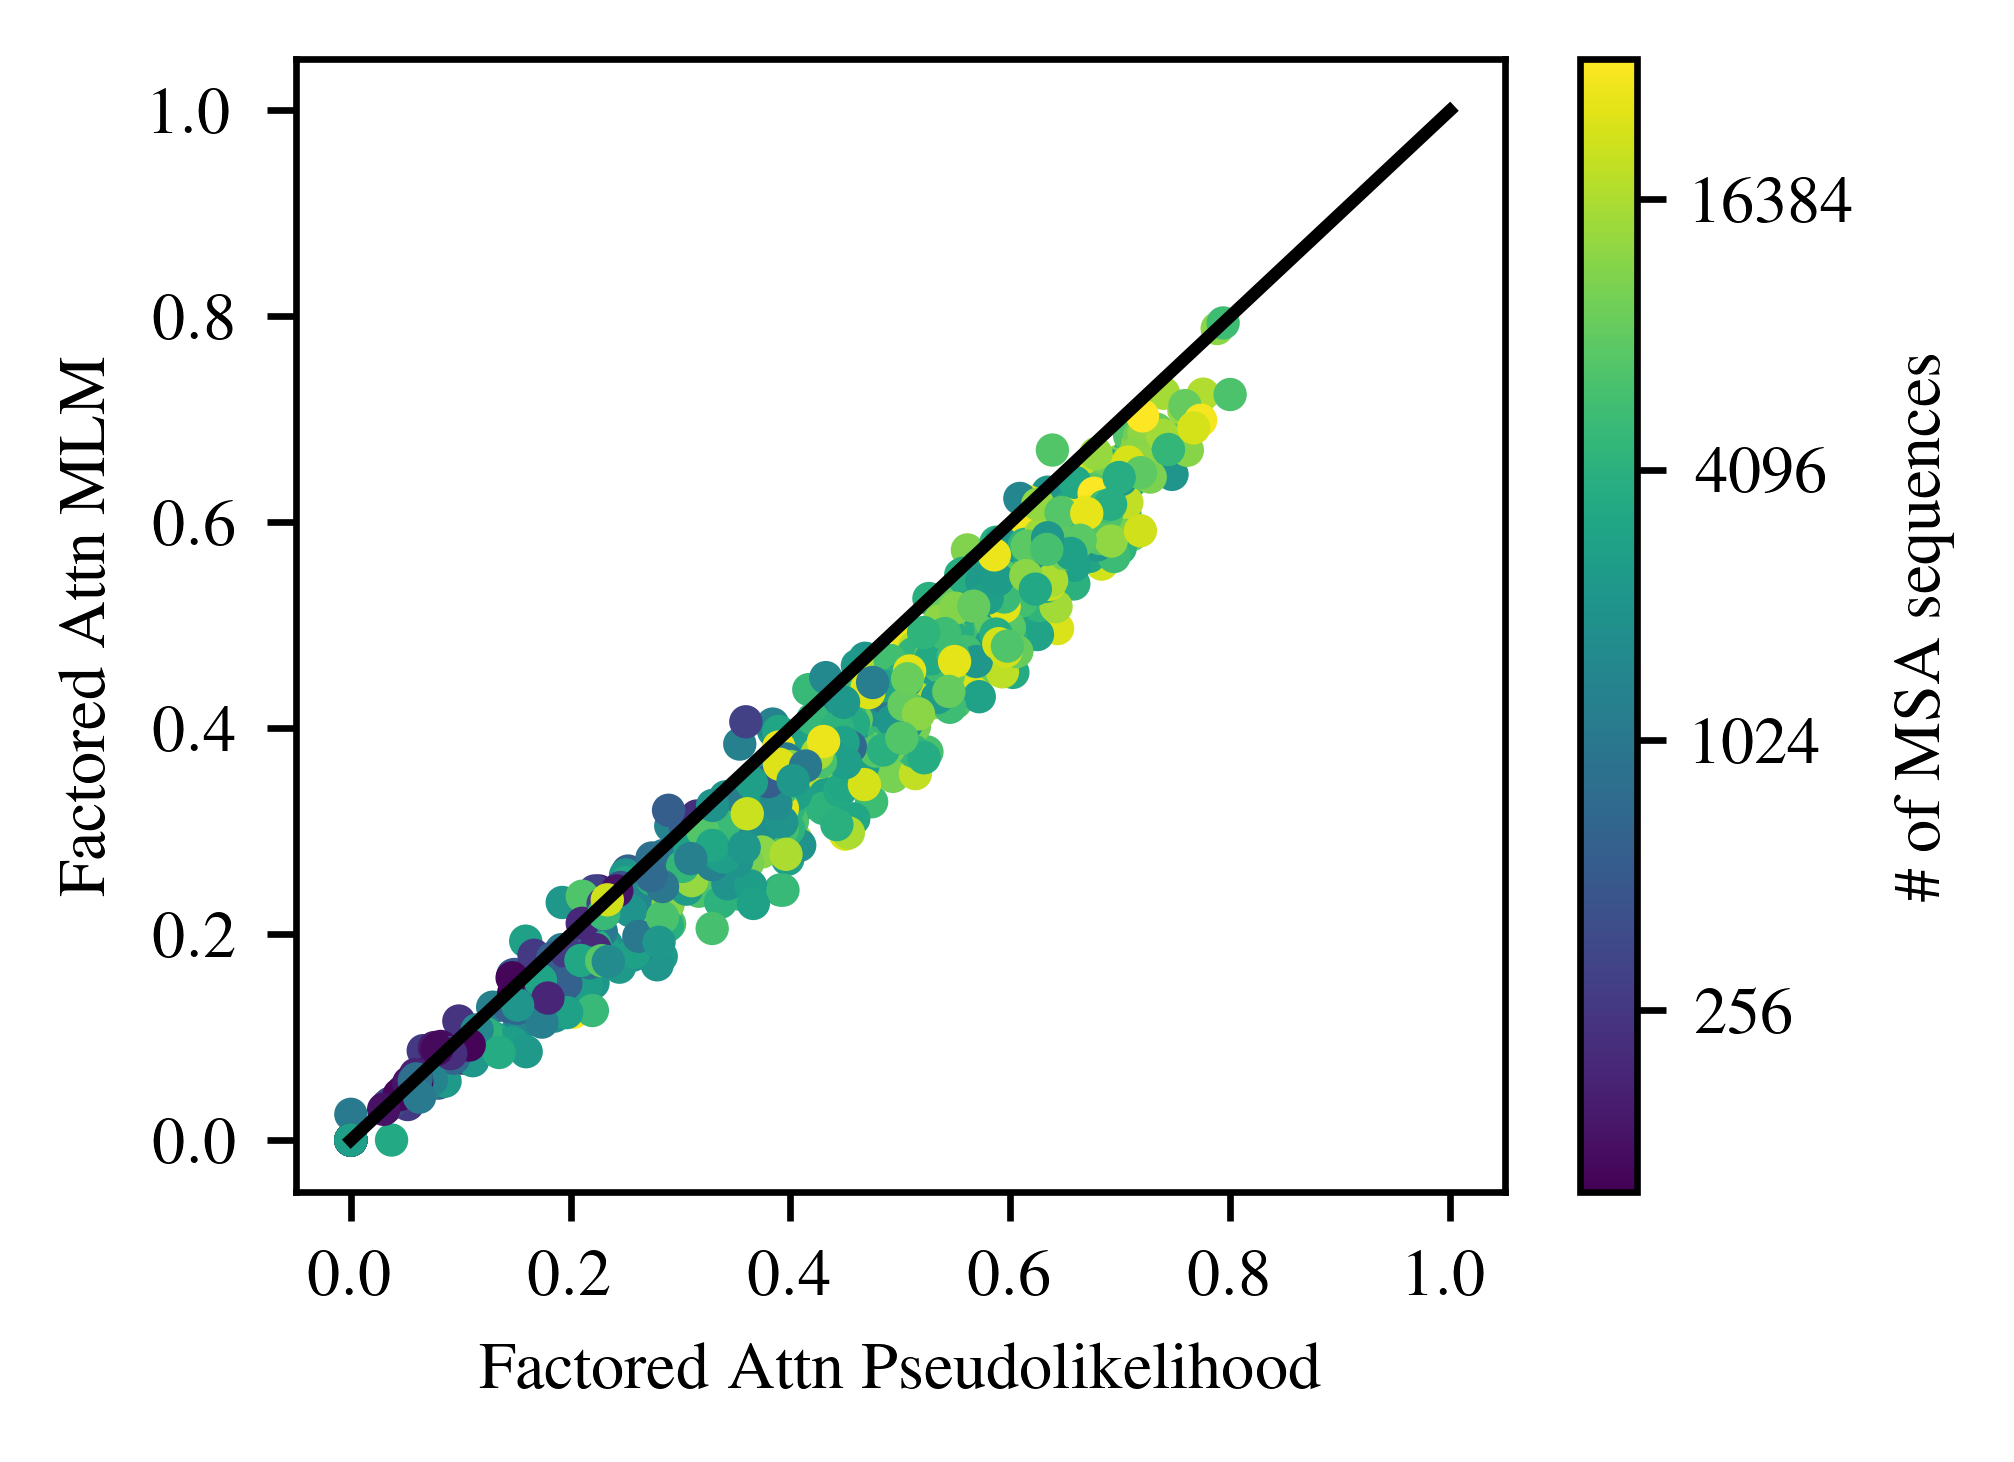

In [73]:
plt.figure(figsize=(3.25, 2.5), dpi=600)
multimsa_pair_plot(df, "gremlin", "gremlin-mlm", "pr_at_L")
plt.ylabel("Potts MLM")
plt.xlabel("Potts Pseudolikelihood")
plt.savefig("figs/final/gremlin_mlm_vs_pseudo.pdf", bbox_inches="tight")
#cbar = plt.colorbar()
#cbar.set_ticks(ticker.LogLocator(), update_ticks=True)
plt.show()

plt.figure(figsize=(3.25, 2.5), dpi=600)
multimsa_pair_plot(df, "fatt", "fatt-mlm", "pr_at_L_apc")
plt.ylabel("Factored Attn MLM")
plt.xlabel("Factored Attn Pseudolikelihood")
plt.savefig("figs/supp/fatt_mlm_vs_pseudo.pdf", bbox_inches="tight")
plt.show()

# Effect of APC (Fig 10)

## P @ L

In [144]:
RUNS = {
    "fatt": "xuofwjtc",
    "gremlin": "dbuvl02g",
}

df = load_full_df(RUNS, ["protbert_bfd", "transformer"])

100%|██████████| 748/748 [00:00<00:00, 55887.19it/s]

xuofwjtc has 748 runs
dbuvl02g has 748 runs
l37wrnsa has 748 runs
zd8rc6j7 has 748 runs



/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/nickbhat/projects/iclr-2021-factored-attention/compare_wandb.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

Shape pre dropping NaNs (2857, 15)
Shape post dropping NaNs (2857, 15)


/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0, 1.0)

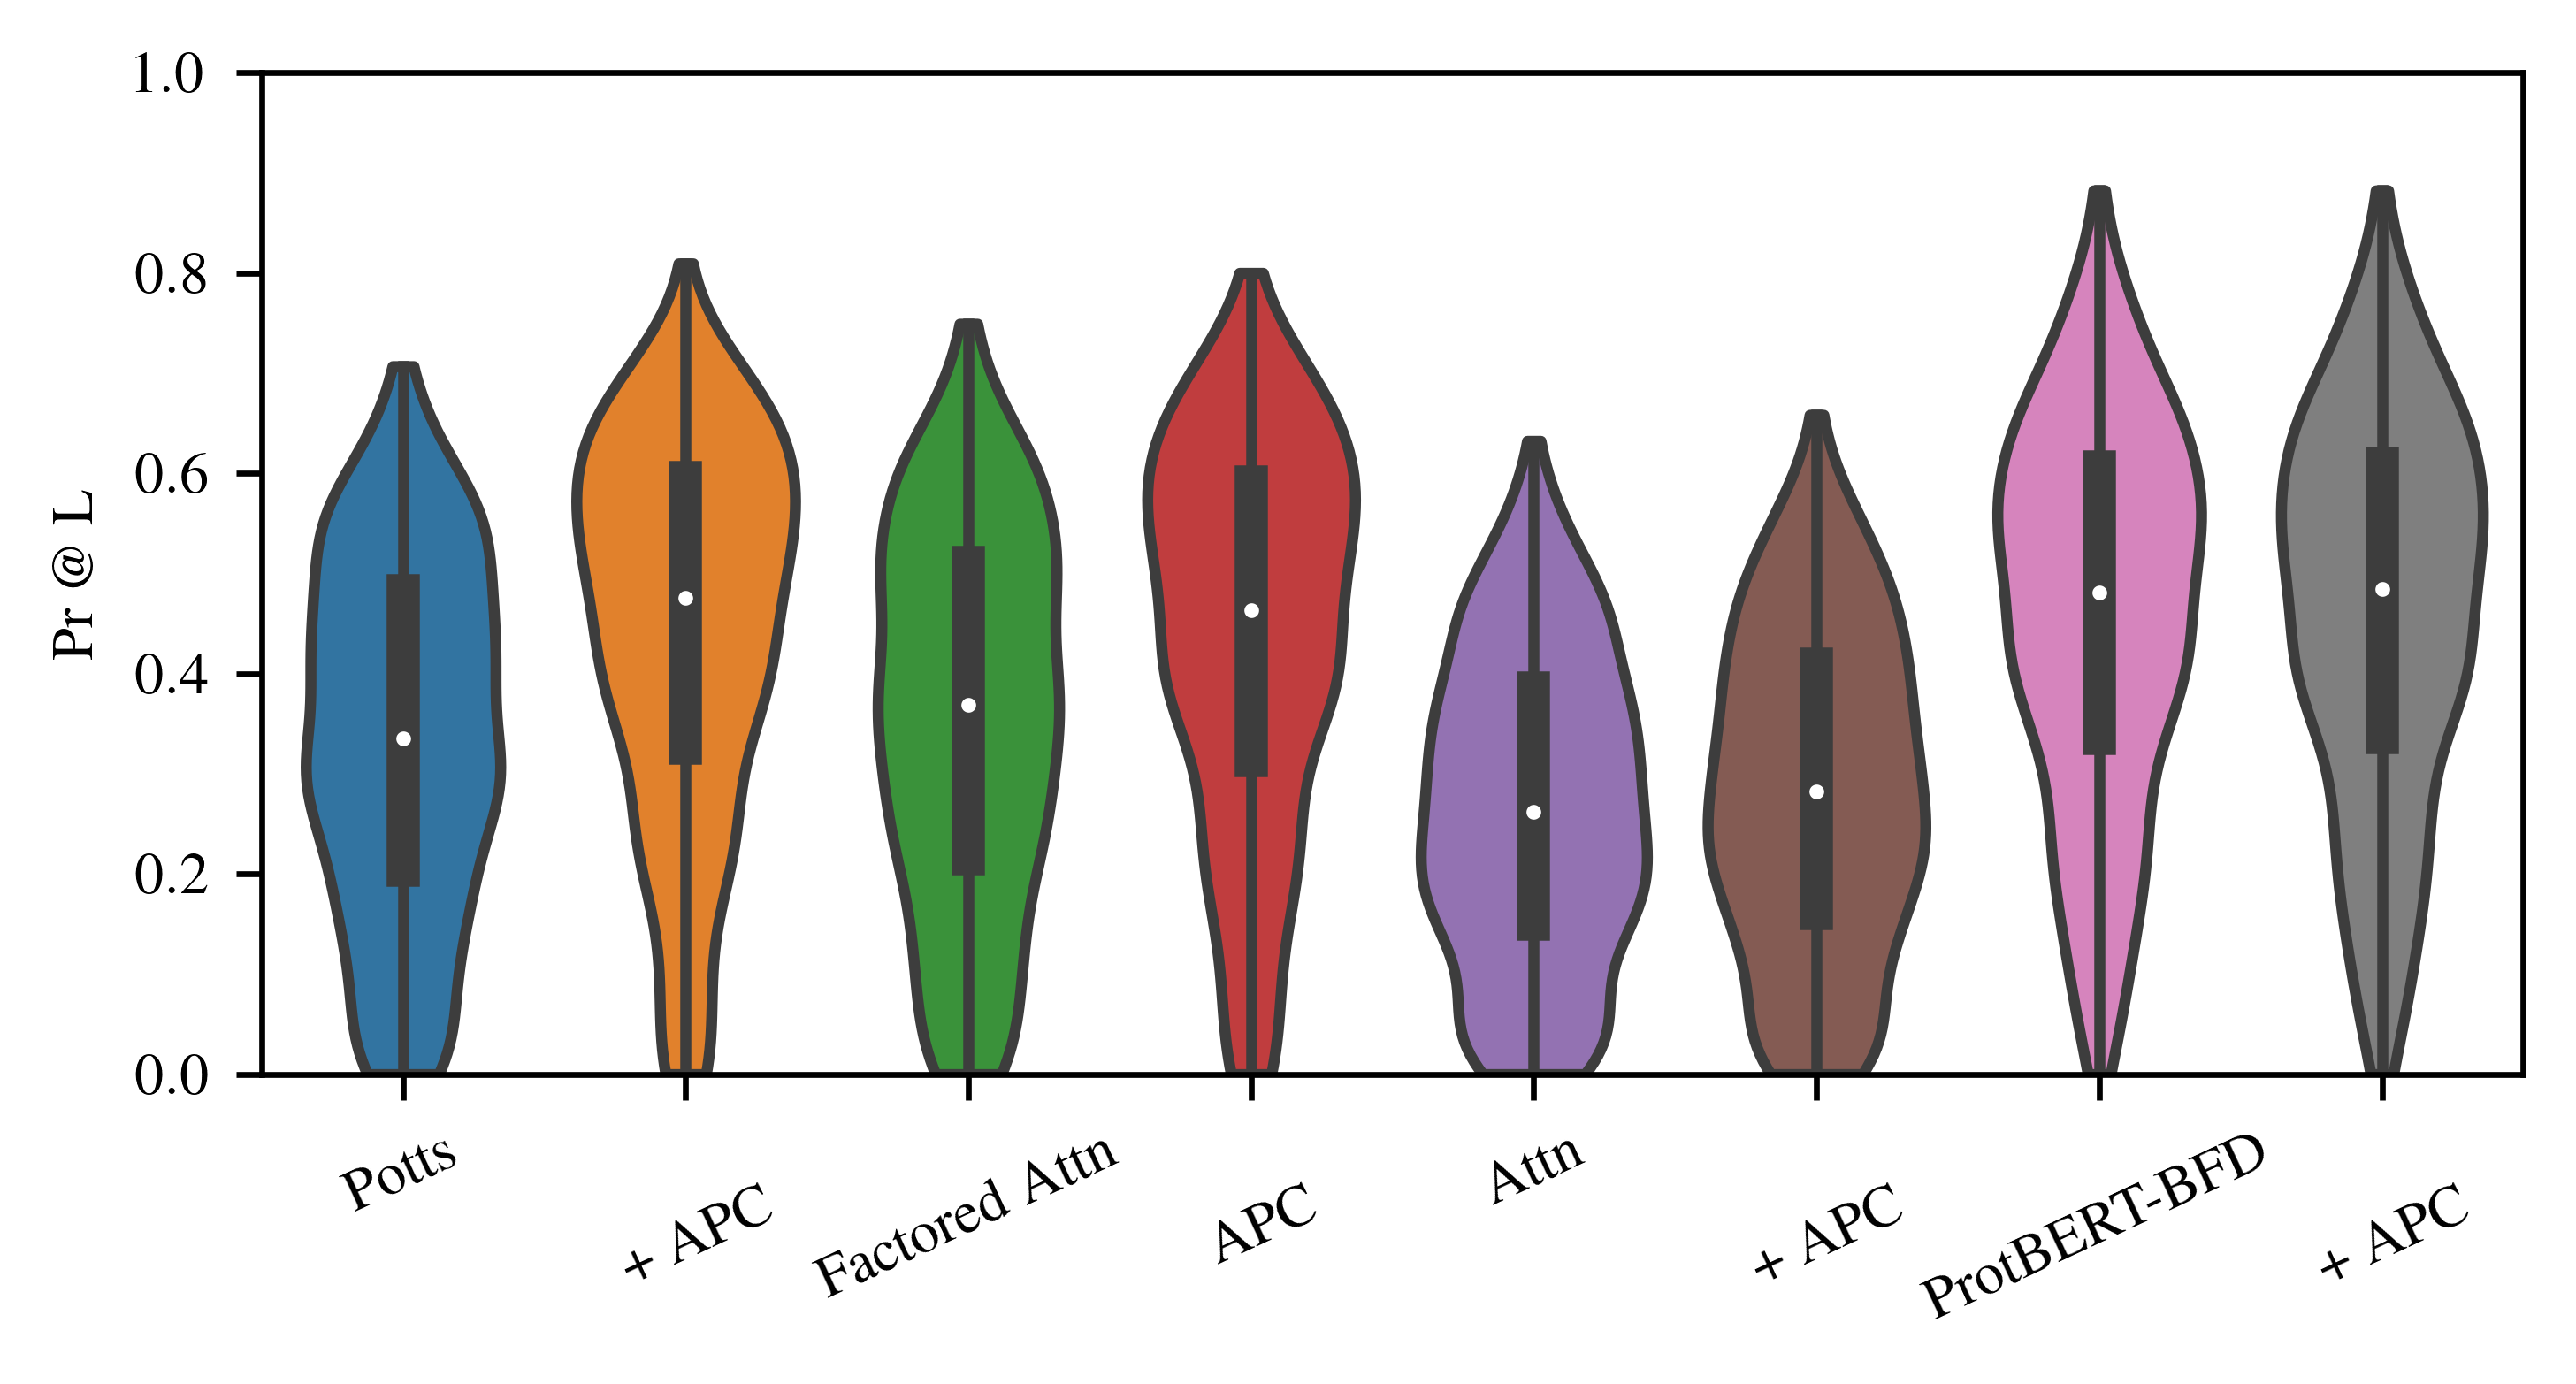

In [145]:
fig, ax = plt.subplots(figsize=(5.5, 2.5), dpi=600)
sns.violinplot(x="sweep_name", y="pr_at_L", order=["gremlin", "gremlin-apc", "fatt", "fatt-apc", "transformer", "transformer-apc", "protbert_bfd", "protbert_bfd-apc"], data=df, cut=0)
ax.set_xticklabels(["Potts", "\n + APC", "Factored Attn", "\n APC", "Attn", "\n + APC", "ProtBERT-BFD", "\n + APC"], Rotation=25)
plt.xlabel("")
plt.ylabel("Pr @ L")
plt.ylim(0., 1.)

In [141]:
df.apc

0      False
1      False
2      False
3      False
4      False
       ...  
743     True
744     True
745     True
746     True
747     True
Name: apc, Length: 11604, dtype: bool

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':


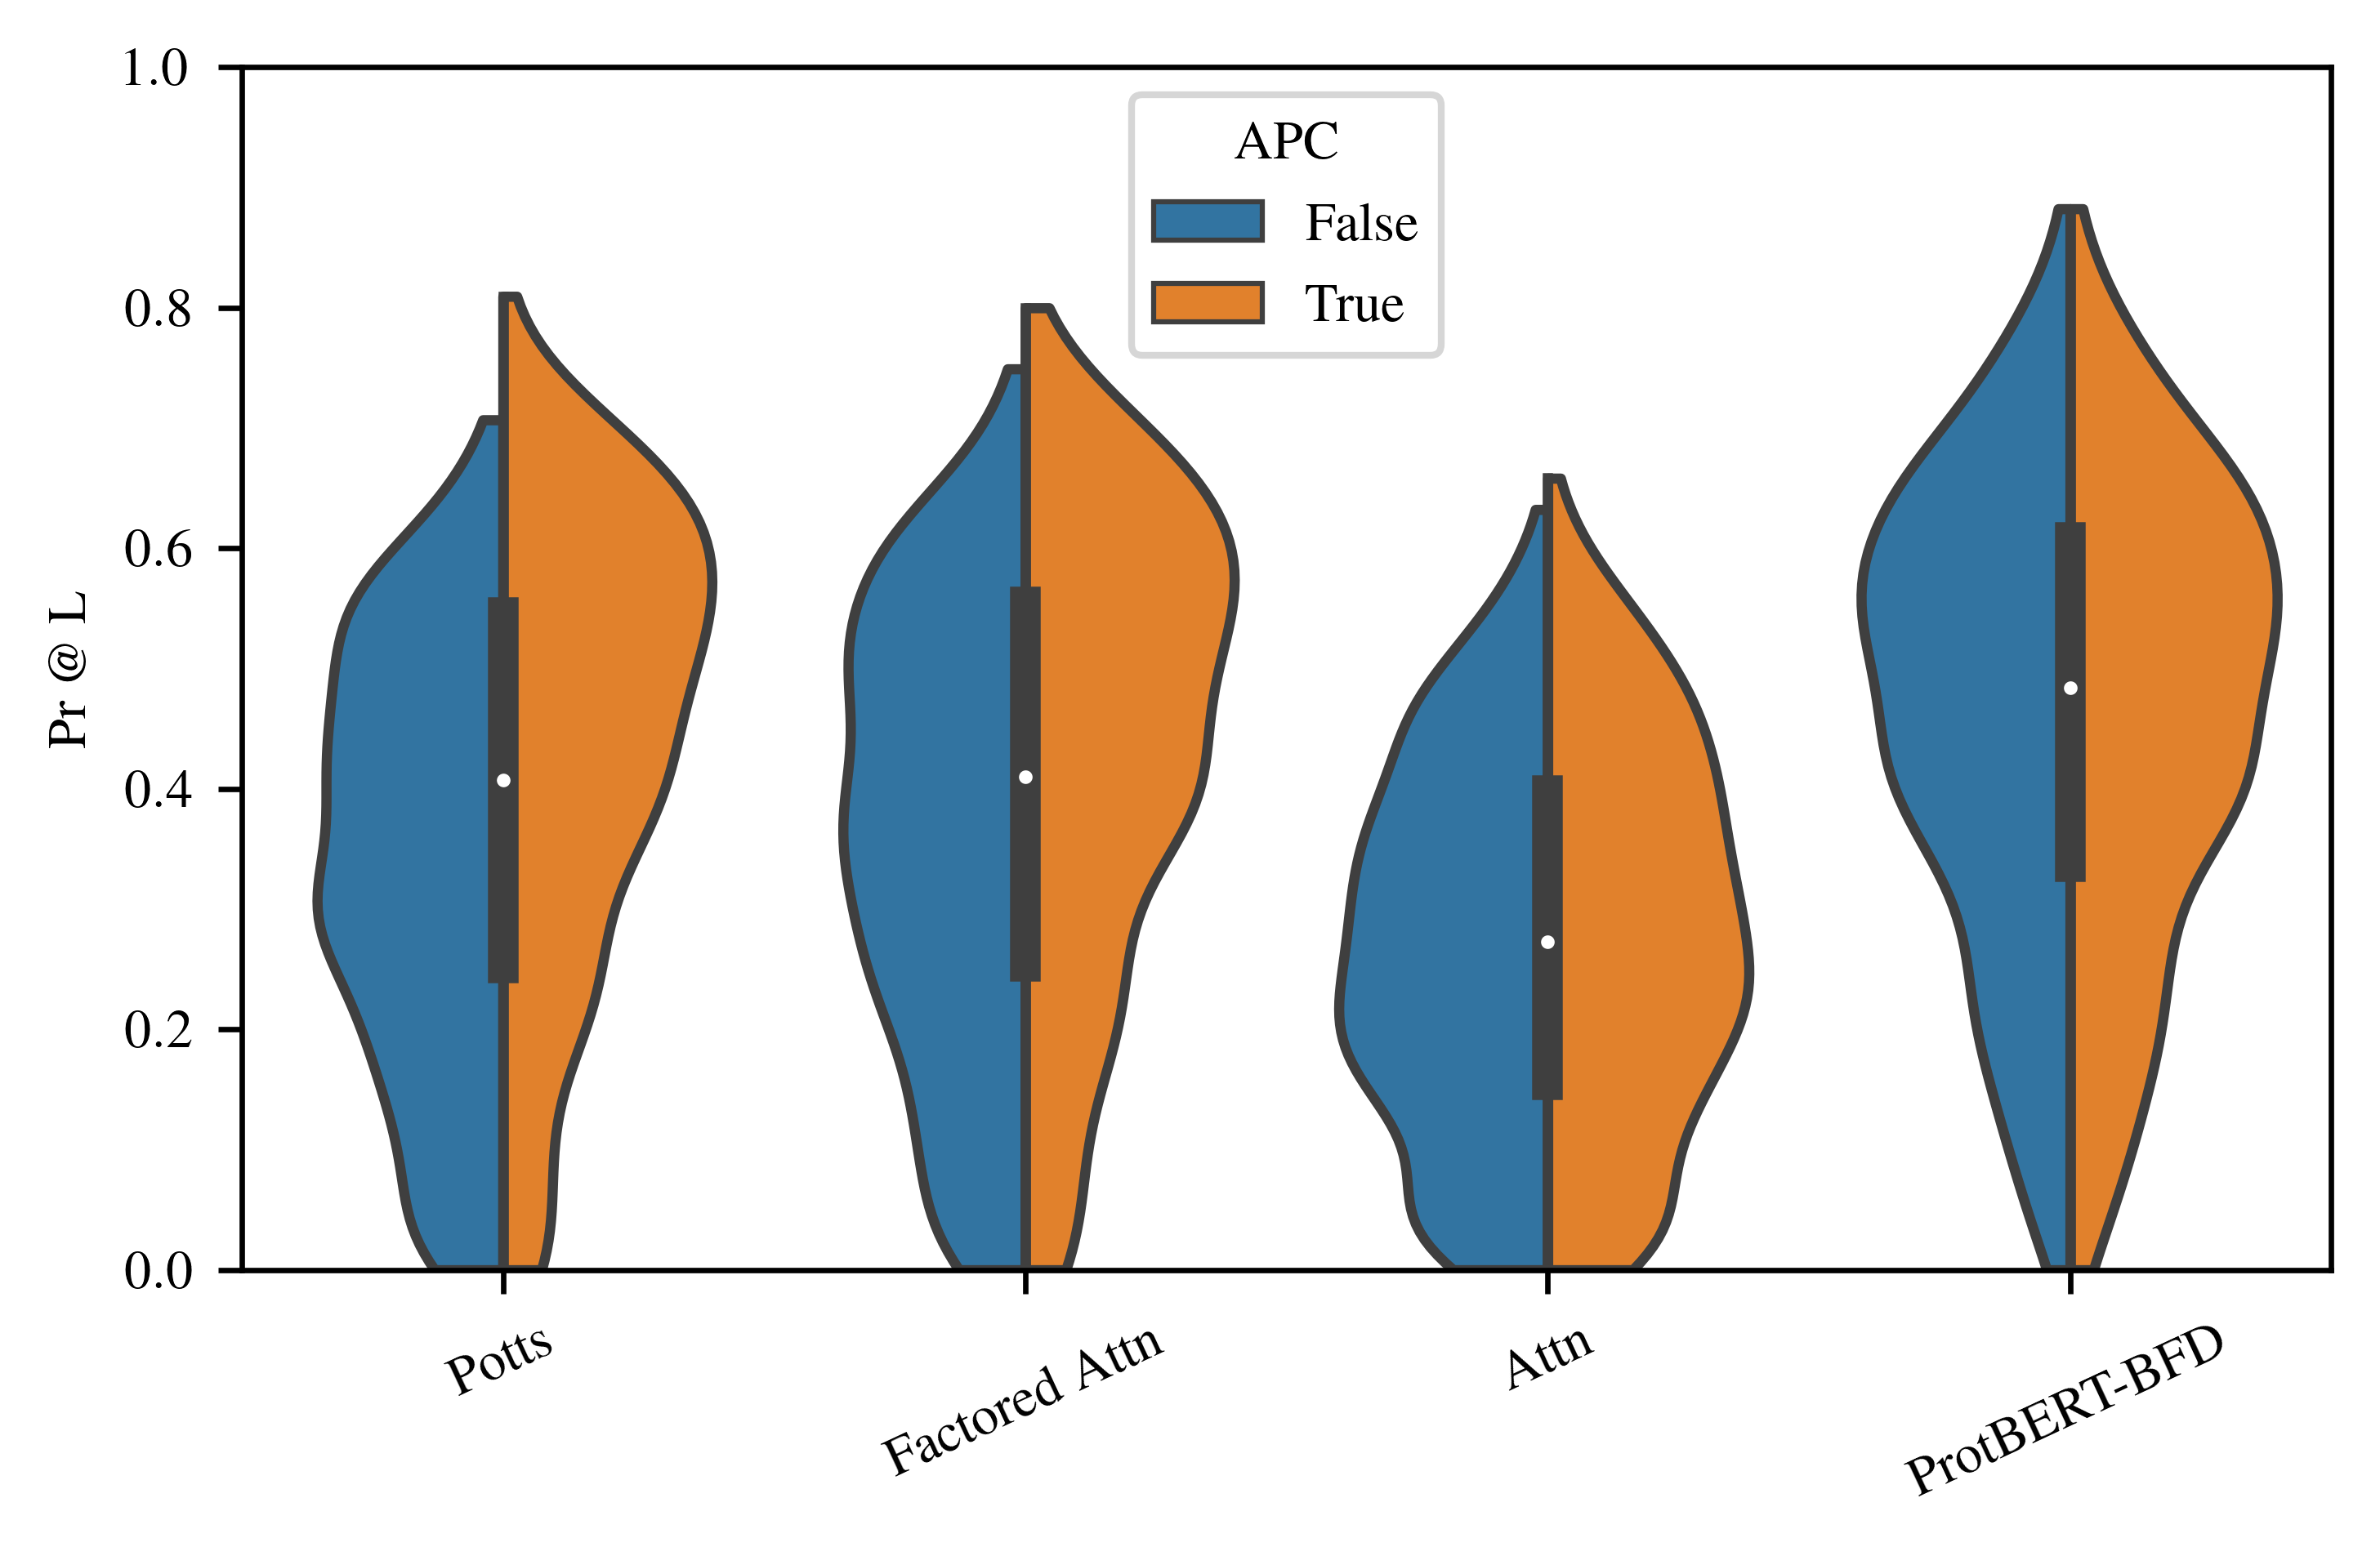

In [164]:
fig, ax = plt.subplots(figsize=(5.5, 3.25), dpi=600)
g = sns.violinplot(
    x="model", 
    y="pr_at_L", 
    hue="apc", 
    order=["gremlin", "factored_attention", "transformer", "protbert_bfd"], 
    data=df, 
    cut=0,
    split=True,
)
plt.legend(loc="upper center", title="APC")
ax.set_xticklabels(["Potts", "Factored Attn", "Attn", "ProtBERT-BFD"], Rotation=25)
plt.xlabel("")
plt.ylabel("Pr @ L")
plt.ylim(0., 1.)
plt.savefig("figs/supp/apc_effect.pdf", bbox_inches="tight")


## P @ L/5

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0, 1.0)

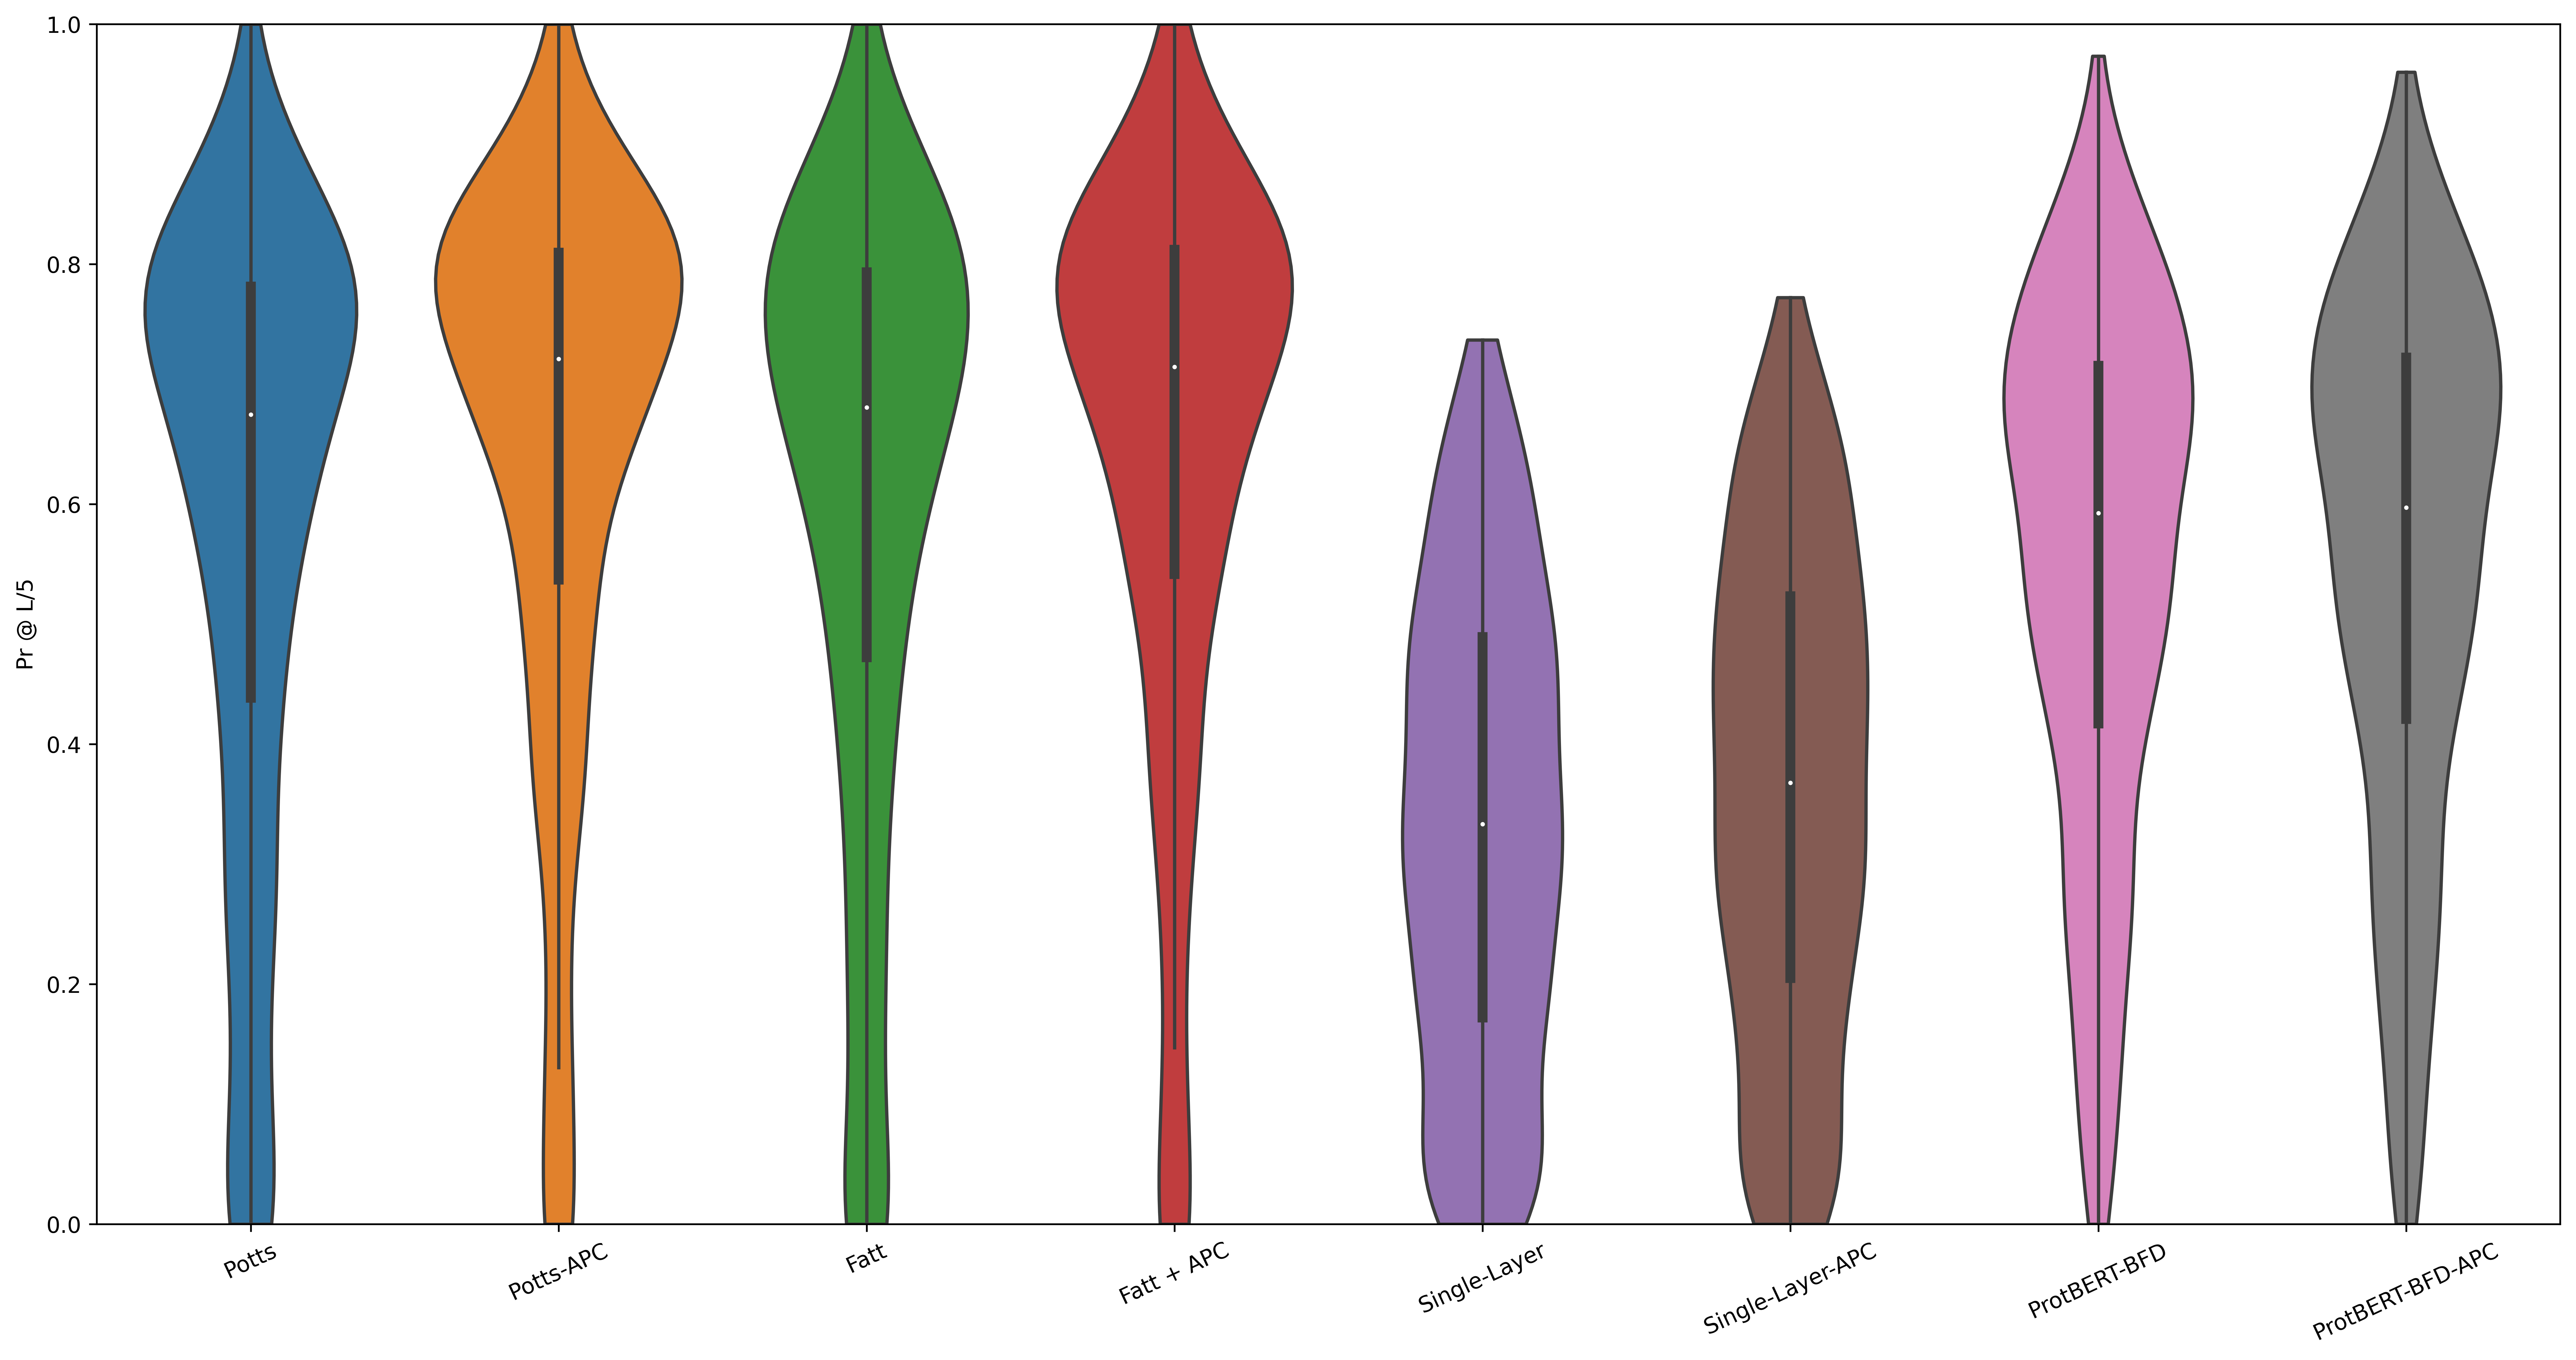

In [59]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=600)
sns.violinplot(x="sweep_name", y="pr_at_L_5", order=["gremlin", "gremlin-apc", "fatt", "fatt-apc", "transformer", "transformer-apc", "protbert-bfd", "protbert-bfd-apc"], data=df, cut=0)
ax.set_xticklabels(["Potts", "Potts-APC","Fatt", "Fatt + APC", "Single-Layer", "Single-Layer-APC", "ProtBERT-BFD", "ProtBERT-BFD-APC"], Rotation=25)
plt.xlabel("")
plt.ylabel("Pr @ L/5")
plt.ylim(0., 1.)

## AUC

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0, 1.0)

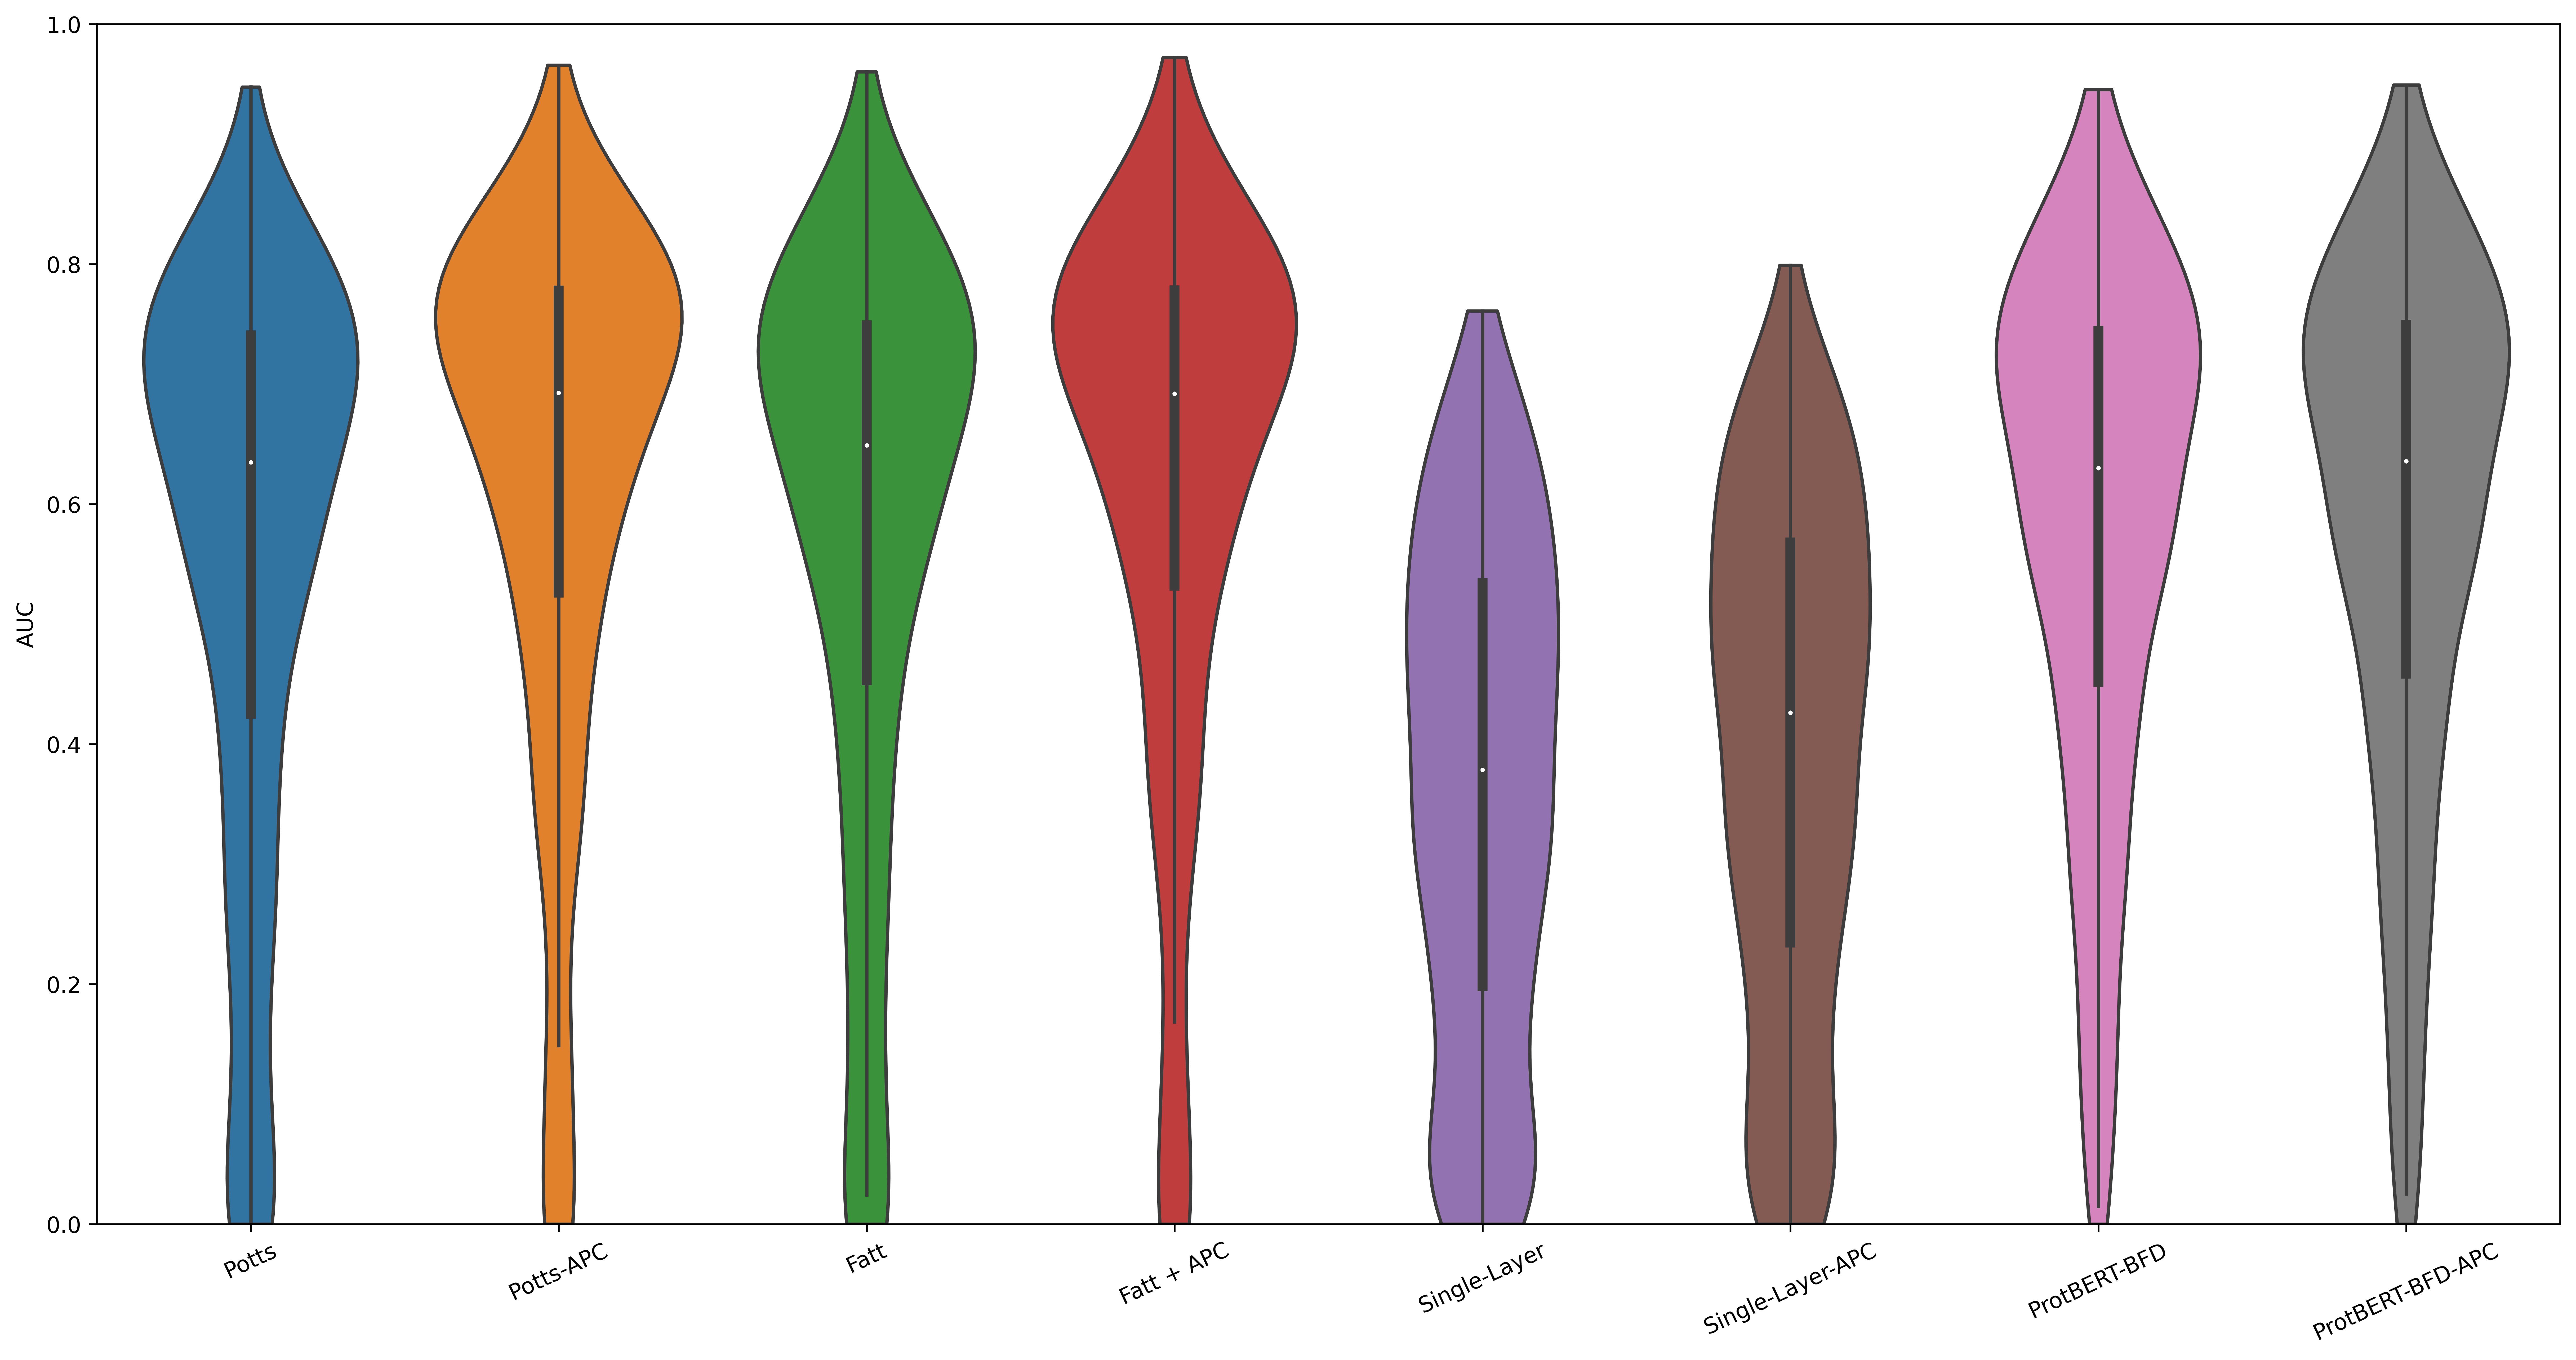

In [57]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=600)
sns.violinplot(x="sweep_name", y="auc", order=["gremlin", "gremlin-apc", "fatt", "fatt-apc", "transformer", "transformer-apc", "protbert-bfd", "protbert-bfd-apc"], data=df, cut=0)
ax.set_xticklabels(["Potts", "Potts-APC", "Fatt", "Fatt + APC", "Single-Layer", "Single-Layer-APC", "ProtBERT-BFD", "ProtBERT-BFD-APC"], Rotation=25)
plt.xlabel("")
plt.ylabel("AUC")
plt.ylim(0., 1.)

# Fatt MLM vs PL(Fig 12)

comparison families:  706


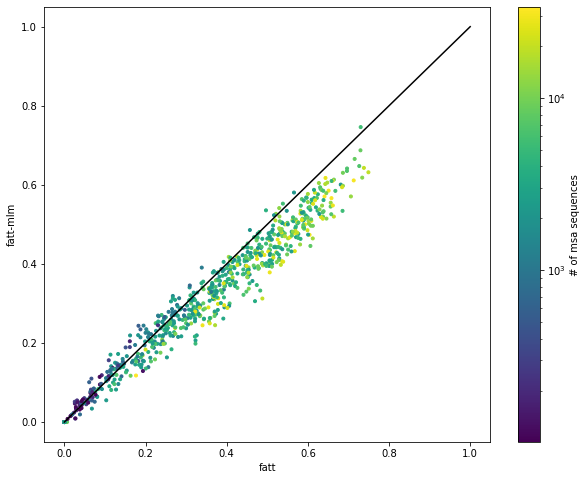

comparison families:  706


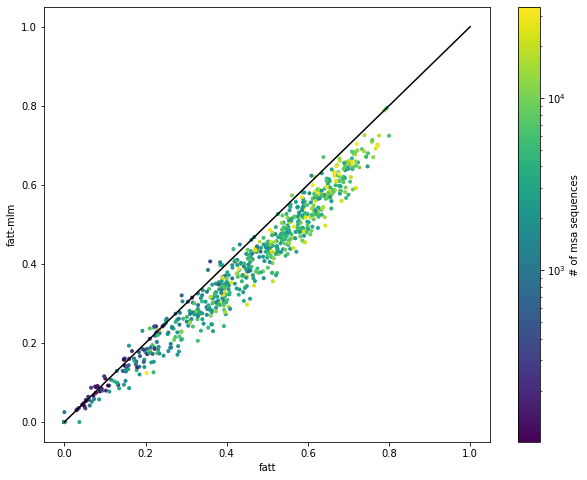

In [48]:
plt.figure(figsize=(10,8))
multimsa_pair_plot(df, "fatt", "fatt-mlm", "pr_at_L")
plt.show()

plt.figure(figsize=(10,8))
multimsa_pair_plot(df, "fatt", "fatt-mlm", "pr_at_L_apc")
plt.show()

# Ablation Studies (Fig 16)

## Alignment Ablation (16.a)

In [191]:
aln_dict = {
    "fatt": "xuofwjtc",
    "fatt-no-aln": "38bumyl7",
}

aln_df = load_full_df(aln_dict, ["transformer", "transformer-no-aln"]) 

aln_df["aln"] = aln_df["use_bias"]

aln_idx = (aln_df.sweep_name == "fatt") | (aln_df.sweep_name == "transformer")
aln_df["aln"][aln_idx] = True
aln_df["aln"][~aln_idx] = False

100%|██████████| 748/748 [00:00<00:00, 87723.39it/s]

xuofwjtc has 748 runs
38bumyl7 has 748 runs
zd8rc6j7 has 748 runs
uvo31t02 has 748 runs


Shape pre dropping NaNs (2855, 15)
Shape post dropping NaNs (2855, 15)


/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/nickbhat/projects/iclr-2021-factored-attention/compare_wandb.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


(-0.01, 1.0)

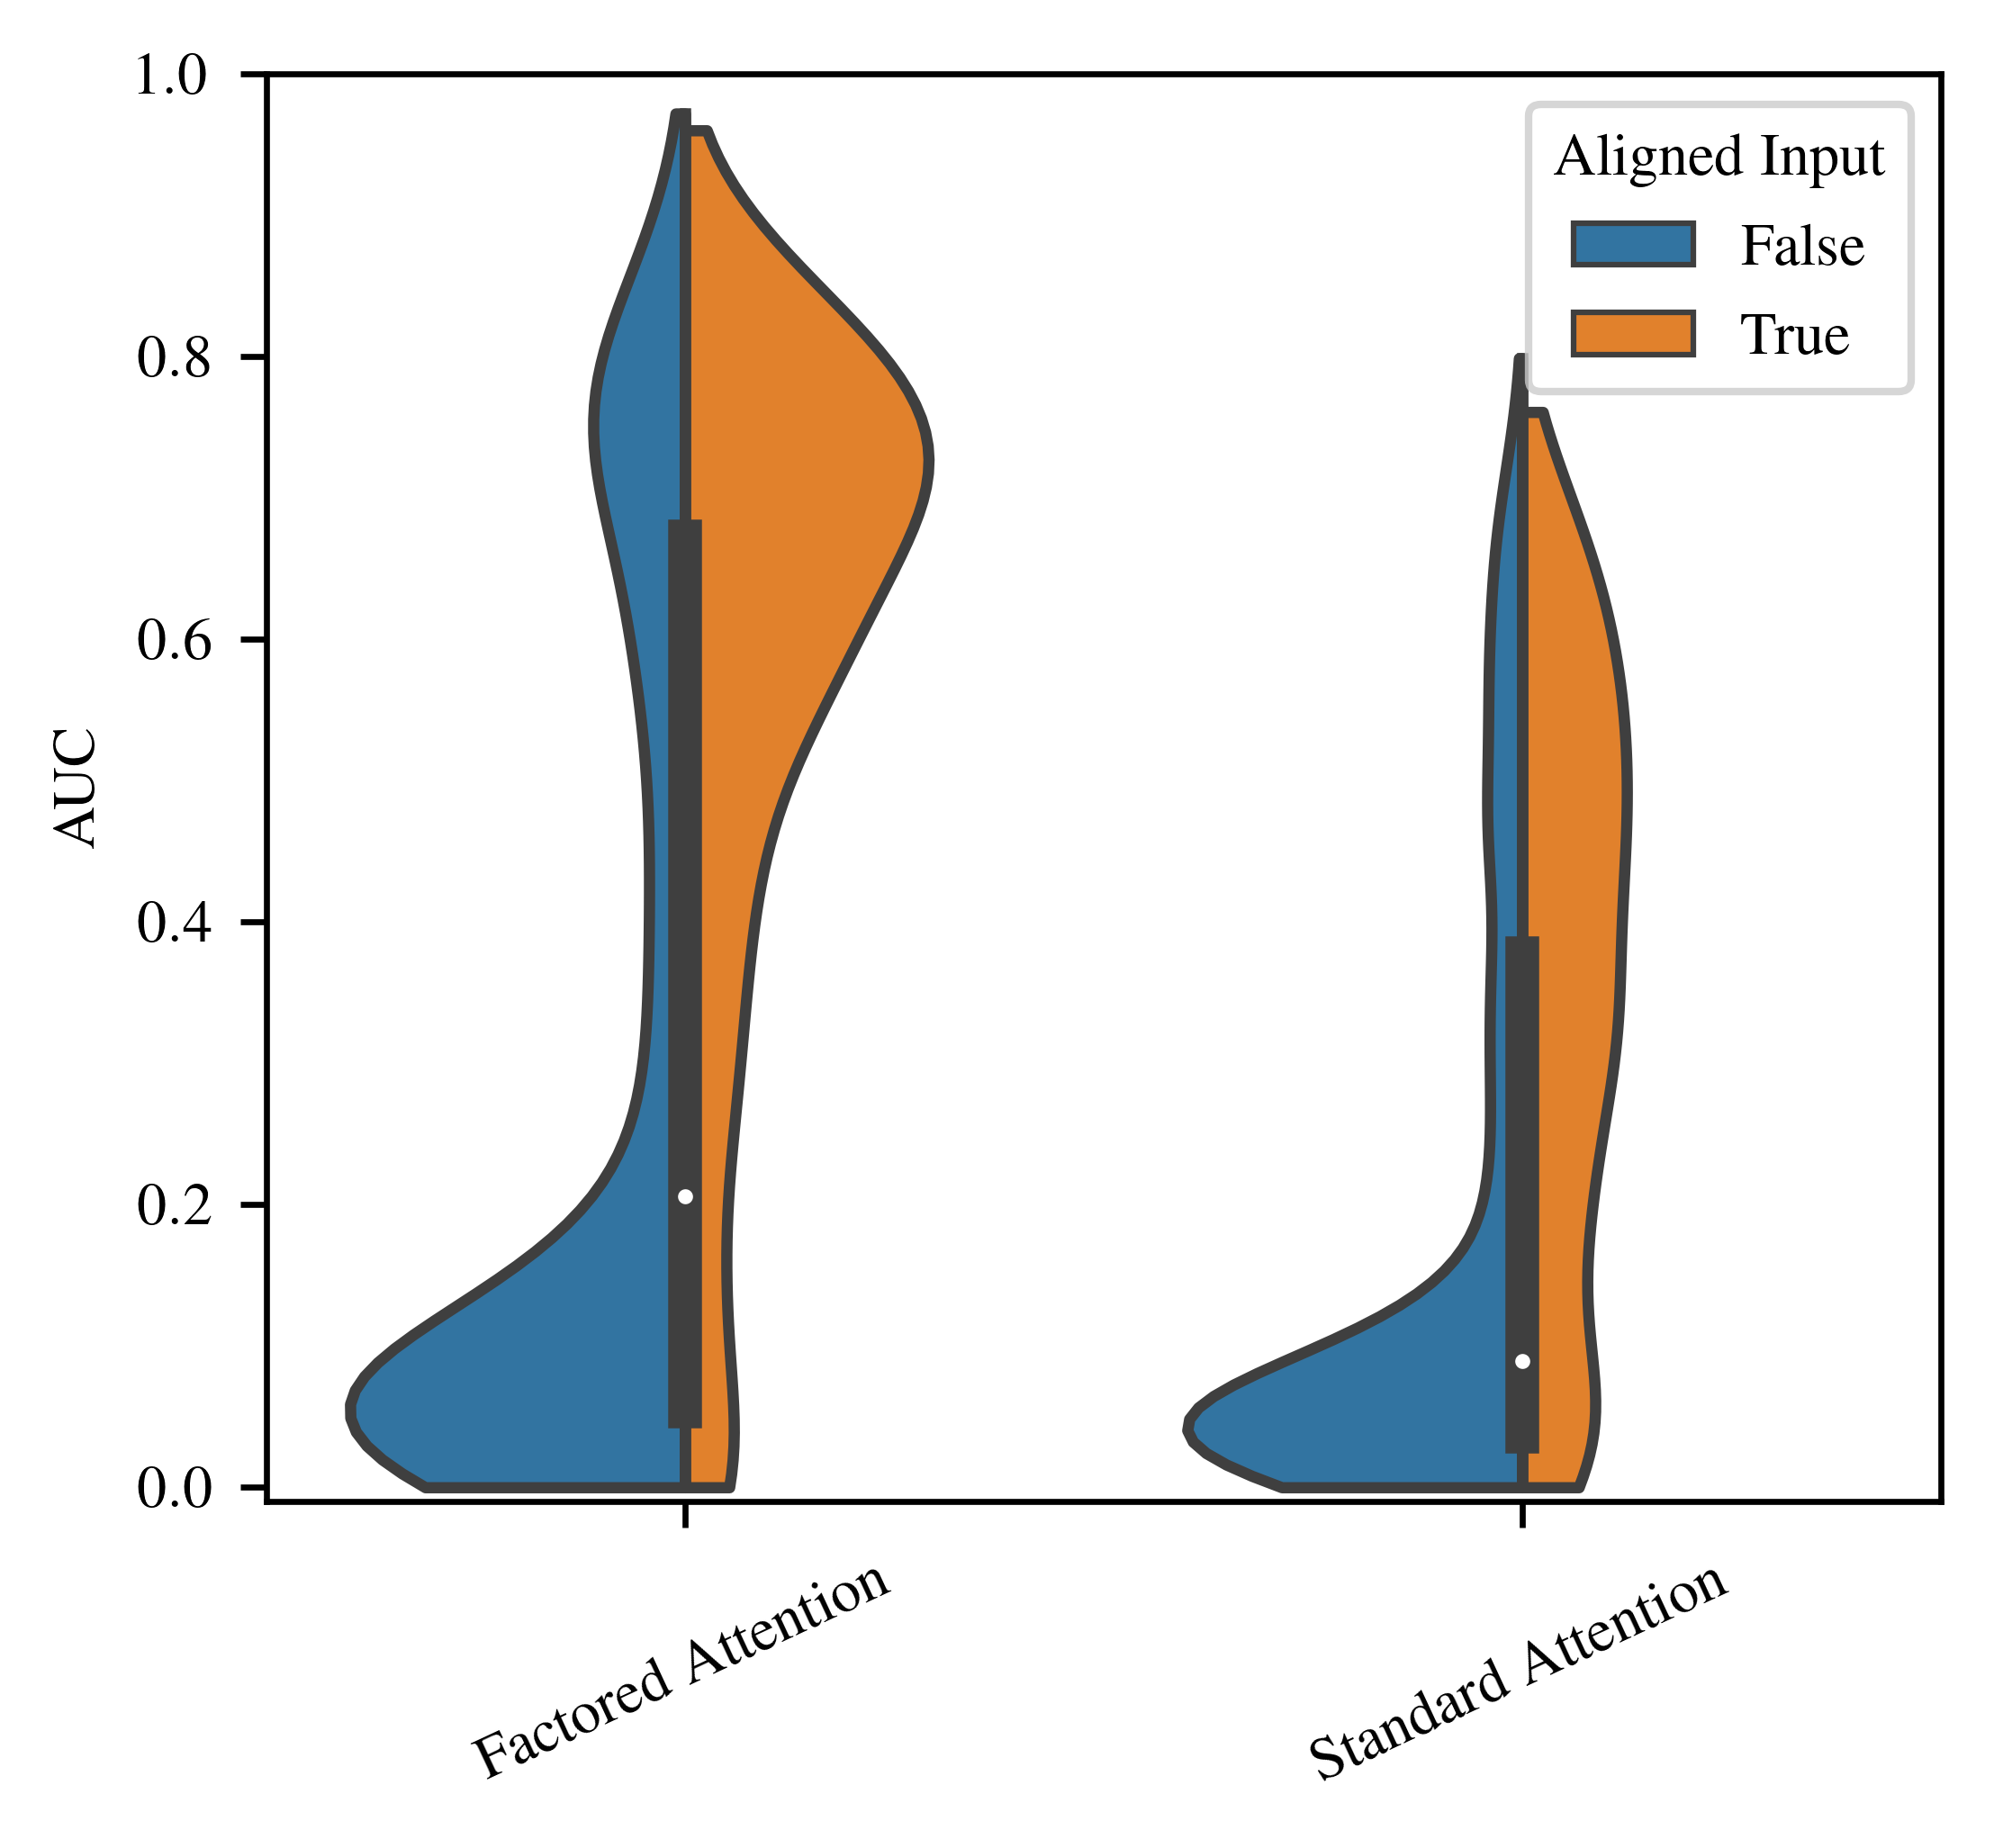

In [222]:
fig, ax = plt.subplots(figsize=(4, 3.5), dpi=600)
g = sns.violinplot(x="model", y="auc", hue="aln", order=["factored_attention", "transformer"], data=aln_df, split=True, cut=0, legend_out=True)
ax.set_xticklabels(["Factored Attention", "Standard Attention"], Rotation=25)
plt.legend(loc="upper right", title="Aligned Input")
plt.xlabel("")
plt.ylabel("AUC")
plt.savefig("figs/supp/auc_violin_aln.pdf", bbox_inches="tight")
plt.ylim(-0.01, 1.)

In [212]:
bias_dict = {
    "fatt": "xuofwjtc",
    "fatt-no-bias": "e75ylc1j",
}

bias_df = load_full_df(bias_dict, ["transformer", "transformer-no-bias"]) 
bias_df["Bias"] = bias_df["use_bias"]

100%|██████████| 748/748 [00:00<00:00, 42427.44it/s]

xuofwjtc has 748 runs



100%|██████████| 748/748 [00:00<00:00, 83415.47it/s]

e75ylc1j has 748 runs
zd8rc6j7 has 748 runs
f4mdy8a6 has 748 runs
Shape pre dropping NaNs (2847, 15)
Shape post dropping NaNs (2846, 15)



/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/nickbhat/projects/iclr-2021-factored-attention/compare_wandb.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


(-0.01, 1.0)

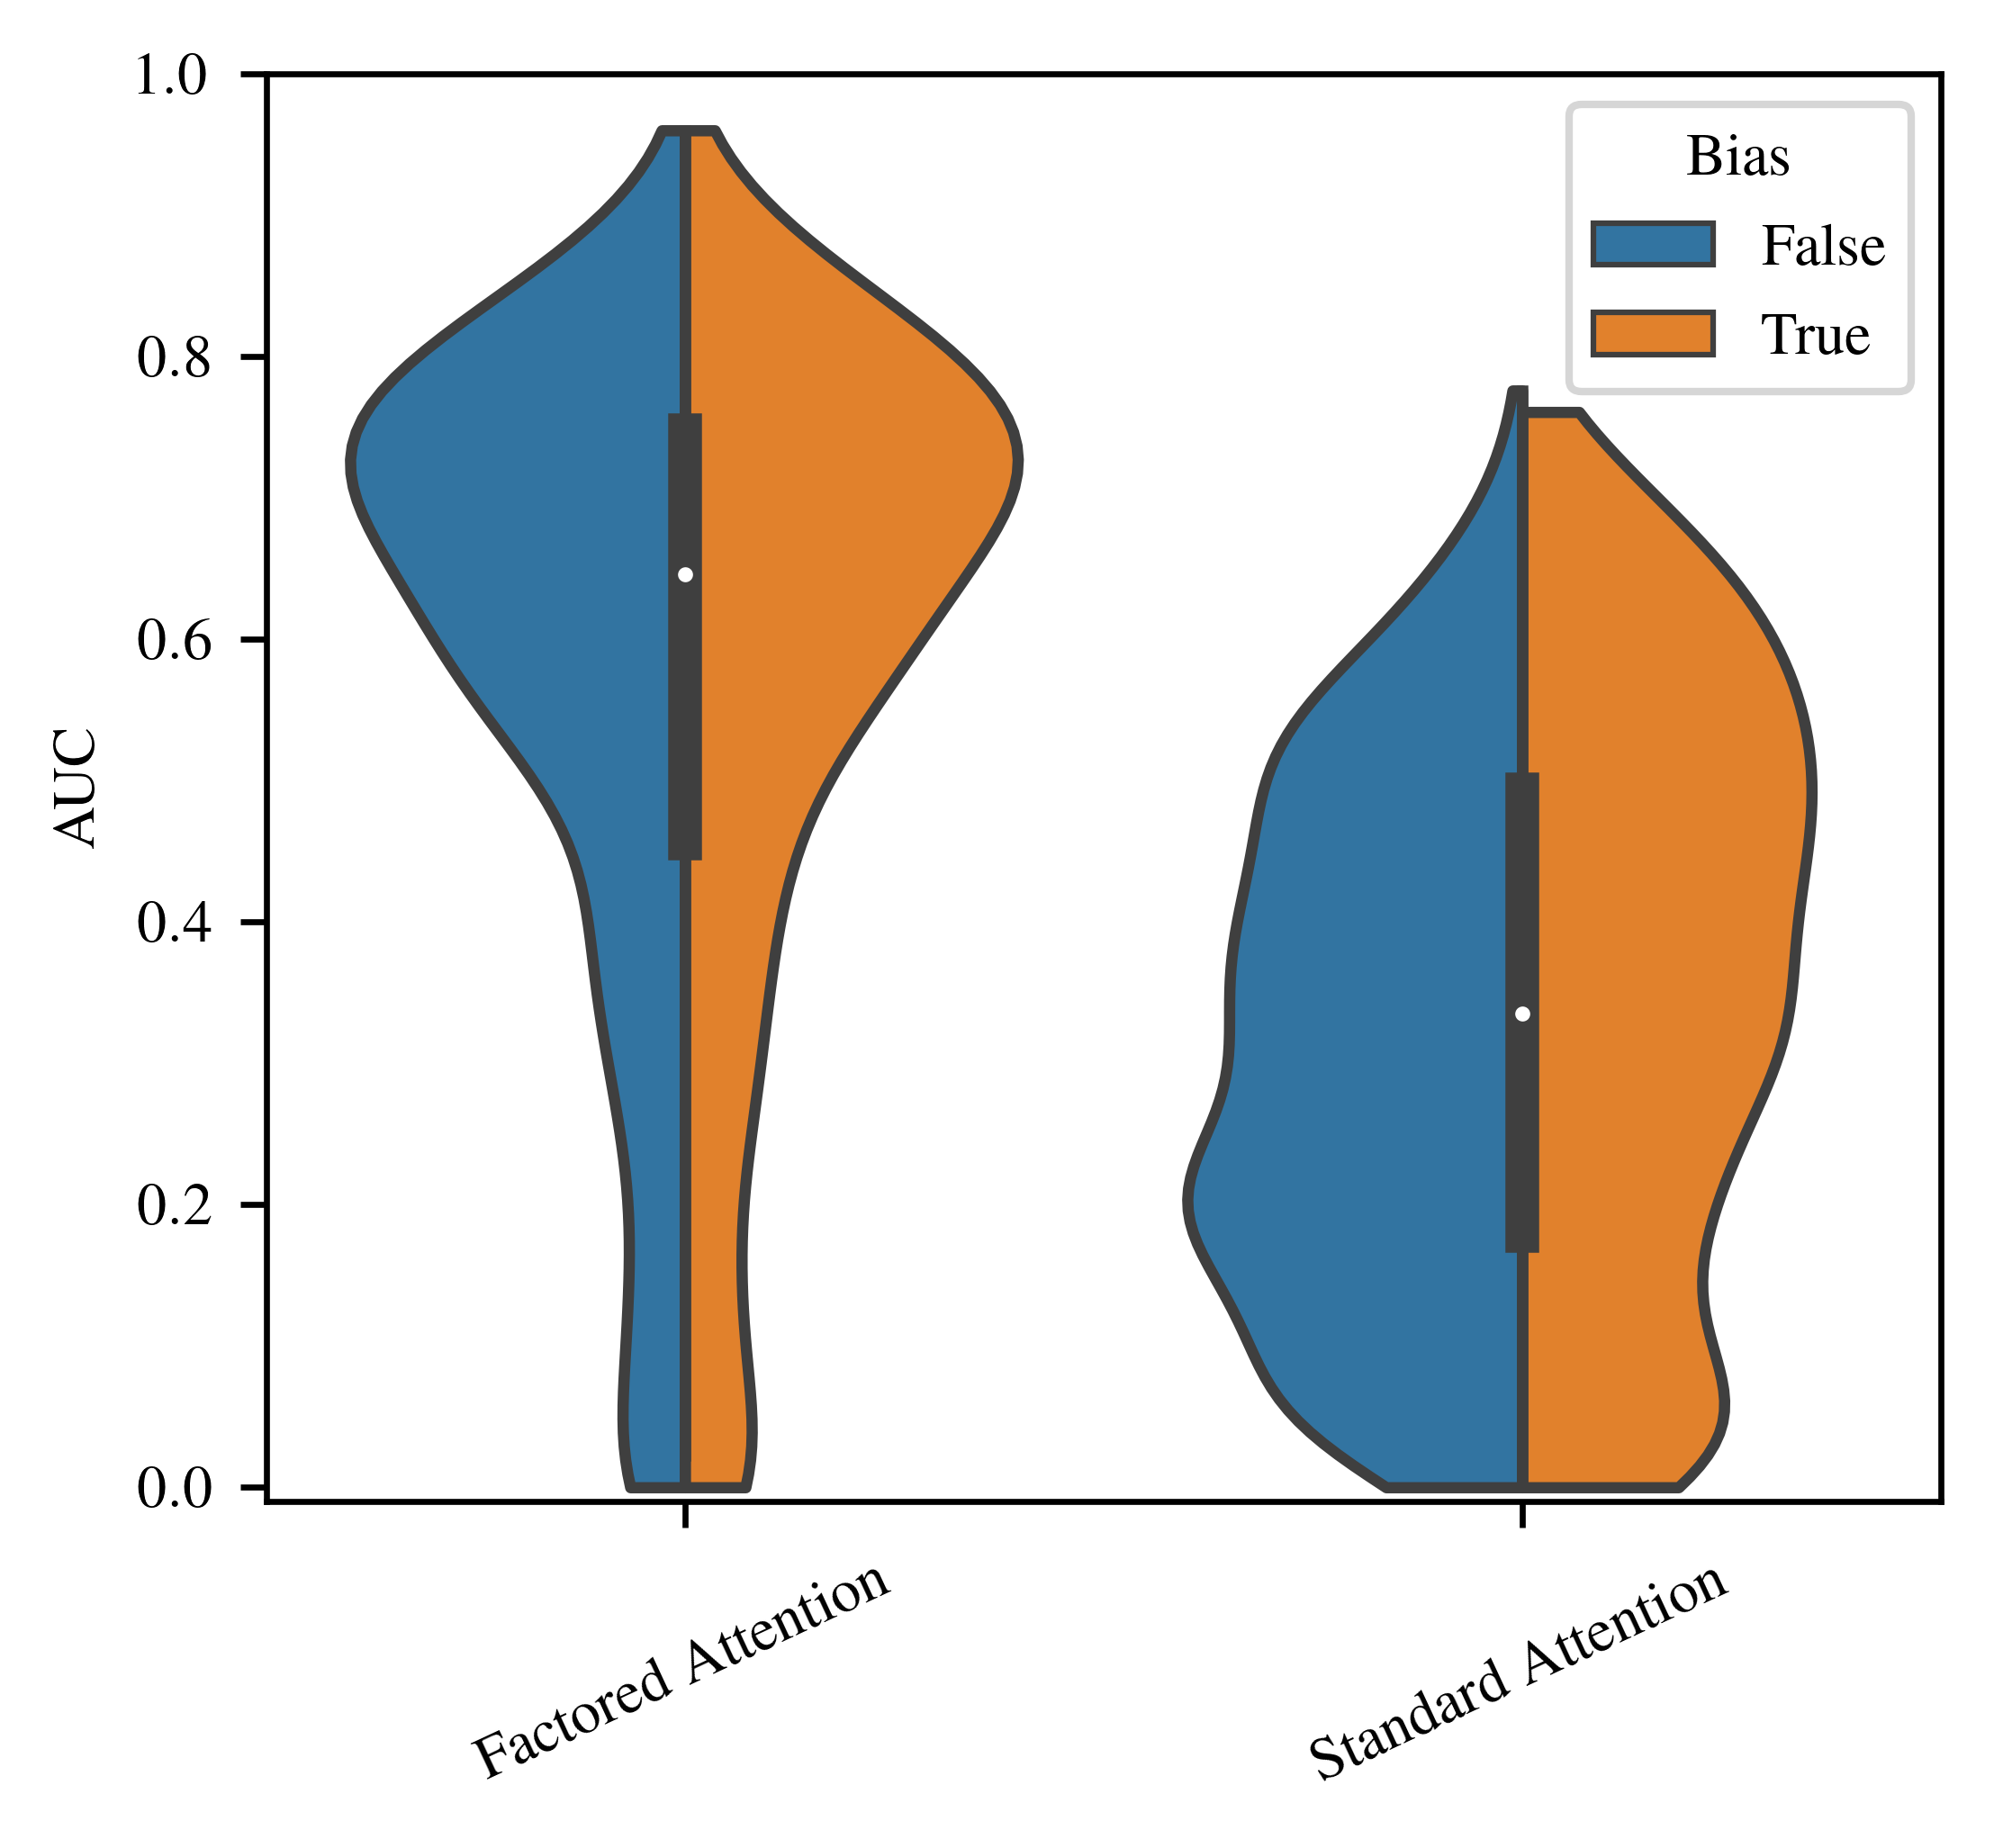

In [214]:
fig, ax = plt.subplots(figsize=(4, 3.5), dpi=600)
sns.violinplot(x="model", y="auc", hue="Bias", order=["factored_attention", "transformer"], data=bias_df[bias_df.apc == False], split=True, cut=0)
ax.set_xticklabels(["Factored Attention", "Standard Attention"], Rotation=25)
plt.xlabel("")
plt.ylabel("AUC")
plt.savefig("figs/supp/auc_violin_bias.pdf", bbox_inches="tight")
plt.ylim(-0.01, 1.)